<a href="https://colab.research.google.com/github/bhaveshinani/Projects/blob/main/BikeSharingDemandPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Bhavesh Inani


# **Project Summary -**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

The goal was to assist bike sharing companies in optimizing their bike inventory and operations to meet customer demand effectively.

Key Steps:

*  **Data Collection and Exploration:** The project began with gathering historical data on bike sharing usage, including features like date and time, weather conditions, and user demographics. Exploratory data analysis (EDA) techniques were applied to understand the distribution of data, identify outliers, and uncover potential patterns and relationships.
Feature Engineering: Features such as time-based features (hour, day, month), weather conditions (temperature, humidity, wind speed), and holiday indicators were engineered to provide meaningful inputs to the predictive model. Techniques like one-hot encoding and scaling were applied to preprocess the data for modeling.
*  **Model Development:** Various machine learning algorithms such as linear regression, decision trees, random forests, and gradient boosting were explored to predict bike demand. Models were trained on historical data and evaluated using metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) R-squared and Adjusted R-squared to assess their performance.
*  **Model Tuning and Optimization:** Hyperparameter tuning techniques such as grid search and random search were employed to optimize the parameters of the best-performing models. Cross-validation techniques were utilized to ensure the generalization of the models to unseen data.
*  **Model Evaluation and Deployment:** The final model was evaluated using a holdout dataset to assess its performance on unseen data. Visualizations such as time series plots and residual plots were used to analyze the model's predictions. Once satisfied with the model's performance, it was deployed to make real-time predictions for bike sharing demand.
Results and Insights:

*  The developed predictive model demonstrated strong performance in forecasting bike sharing demand accurately. Insights derived from the model can help bike sharing companies in making informed decisions regarding inventory management, resource allocation, and marketing strategies. By understanding the factors influencing bike demand, companies can optimize their operations to enhance customer satisfaction and maximize profitability.

# **GitHub Link -**

https://github.com/bhaveshinani

# **Problem Statement**


** Our objective is to make a model that predicts the bike sharing demand for the city.**

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#import libraries
import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import warnings
import warnings
warnings.filterwarnings('ignore')

#importing libraries for variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

#importing important libraries for model deployment
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
from xgboost import XGBRegressor

#libraries for missing values
import missingno as msno
# libraries for saving the model
import pickle

In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


In [ ]:
# importing additional machine learning libraries
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from skopt import BayesSearchCV

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/SeoulBikeData.csv',parse_dates=['Date'],dayfirst=True,encoding='unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'Number of rows :{df.shape[0]}')
print(f'Number of columns :{df.shape[1]}')

Number of rows :8760
Number of columns :14


### Dataset Information

In [ ]:
# Dataset Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(df.duplicated().sum())

0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isna().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


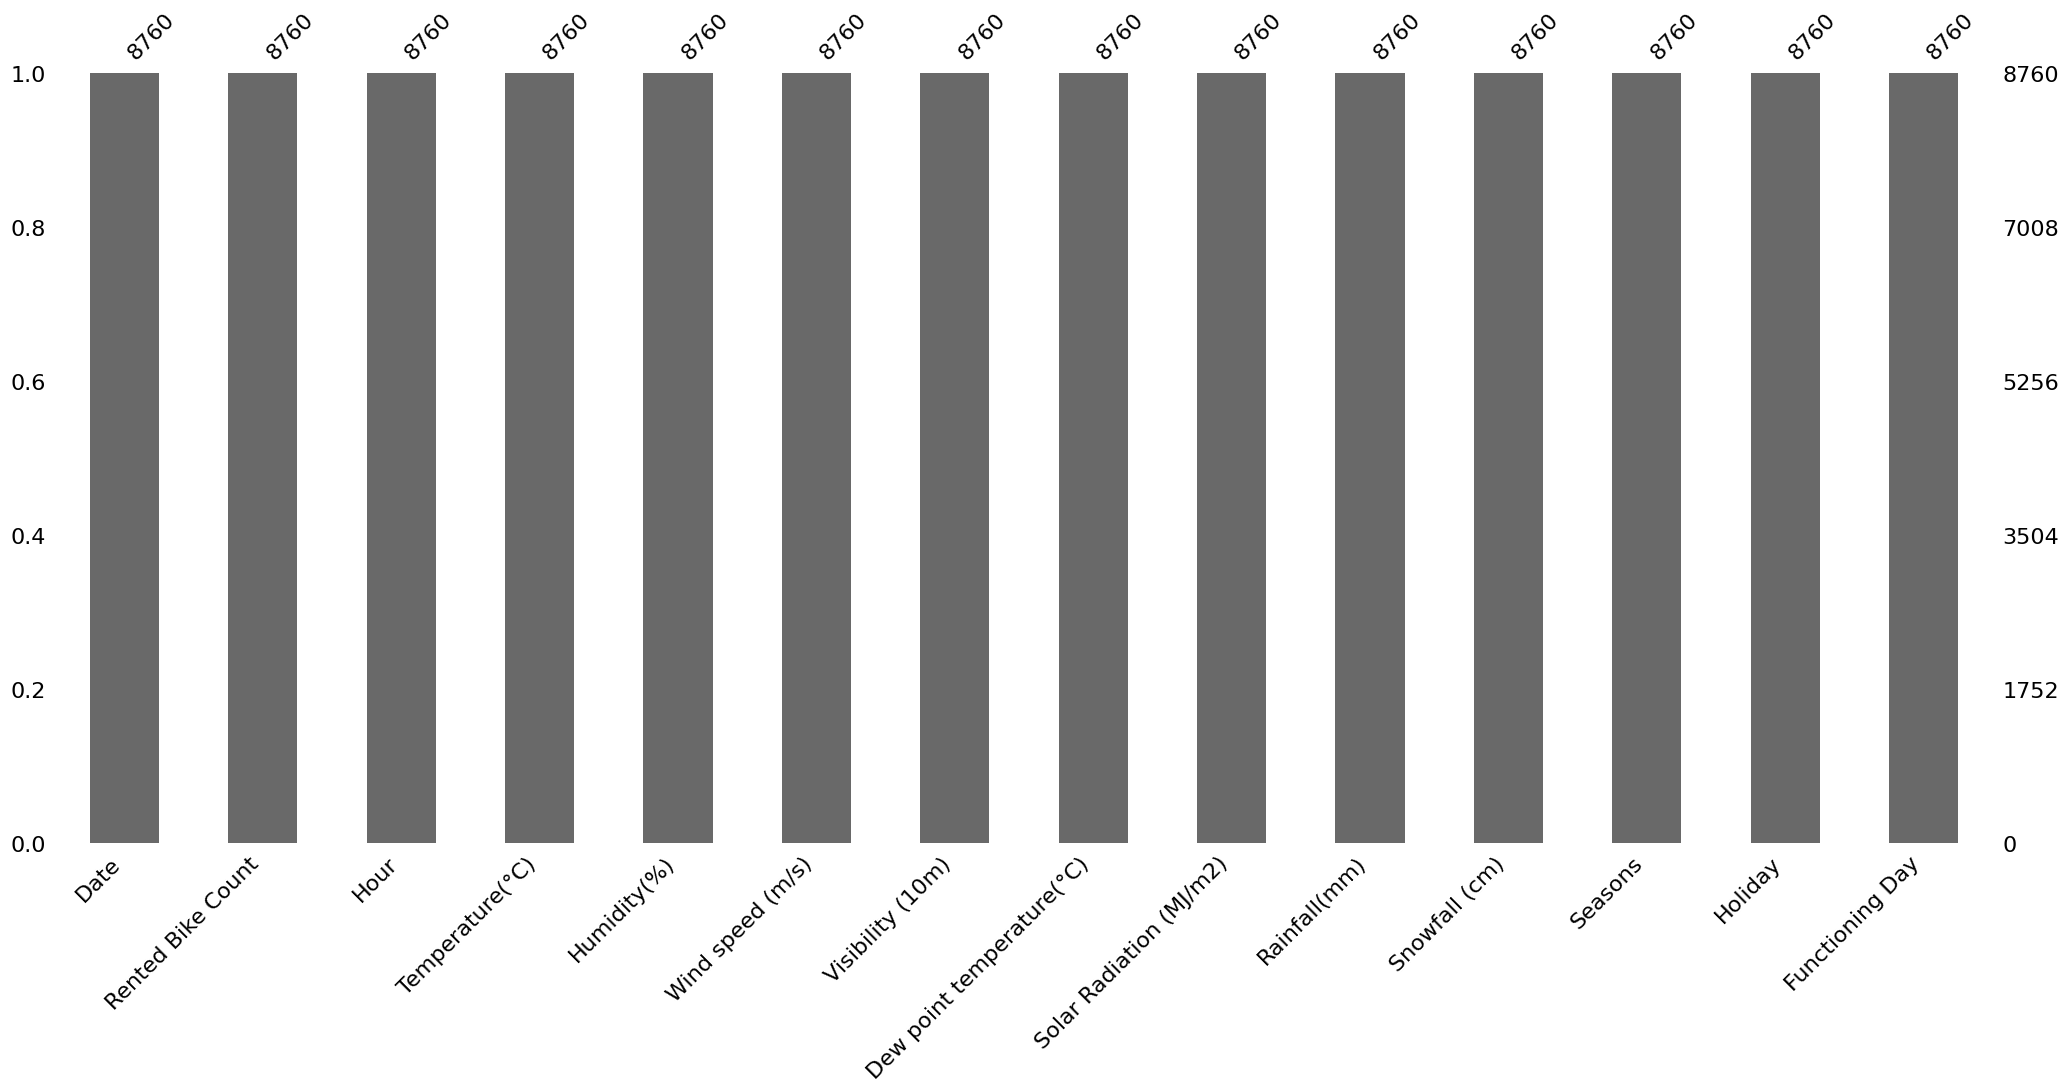

In [ ]:
# Visualizing the missing values by plotting heatmap
msno.bar(df);

### What did you know about your dataset?

The dataset has 8760 rows and 14 columns.

The dataset does not contain any null values.

The dataset does not contain any missing values and duplicate values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(df.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [ ]:
# Dataset Describe
df.describe(include = 'all')

Date  Rented Bike Count         Hour  \
count                            8760        8760.000000  8760.000000   
unique                            NaN                NaN          NaN   
top                               NaN                NaN          NaN   
freq                              NaN                NaN          NaN   
mean    2018-05-31 23:59:59.999999744         704.602055    11.500000   
min               2017-12-01 00:00:00           0.000000     0.000000   
25%               2018-03-02 00:00:00         191.000000     5.750000   
50%               2018-06-01 00:00:00         504.500000    11.500000   
75%               2018-08-31 00:00:00        1065.250000    17.250000   
max               2018-11-30 00:00:00        3556.000000    23.000000   
std                               NaN         644.997468     6.922582   

        Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count       8760.000000  8760.000000       8760.000000       8760.000000   
unique              NaN          NaN               NaN               NaN   
top                 NaN          NaN               NaN               NaN   
freq                NaN          NaN               NaN               NaN   
mean          12.882922    58.226256          1.724909       1436.825799   
min          -17.800000     0.000000          0.000000         27.000000   
25%            3.500000    42.000000          0.900000        940.000000   
50%           13.700000    57.000000          1.500000       1698.000000   
75%           22.500000    74.000000          2.300000       2000.000000   
max           39.400000    98.000000          7.400000       2000.000000   
std           11.944825    20.362413          1.036300        608.298712   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   
std                     13.060369                 0.868746      1.128193   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN

### Variables Description





*   Date : Date
*   Rented Bike Count : Number of bikes on the date(Target variable)
*   Hour : hour of the day(0-23)
*   Temperature(°C) : Temp of the day
*   Humidity(%) : Humidity measure
*   Wind speed (m/s) : Windspeed
*   Visibility (10m) : visibilty measure
*   Dew point temperature(°C) : dew point temperature measure
*   Solar Radiation (MJ/m2) : solar radiation measure
*   Rainfall(mm) : rainfall in mm
*   Snowfall (cm) : snowfall measure in cm
*   Seasons : 1=Spring, 2=Summer,3=Fall,4=Winter
*   Holiday : wether it is a holiday or not
*   Functioning Day : wether it is a functional day or not




### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(df.nunique())

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df2=df.copy()

In [ ]:
#number of rented bikes by functioning days
bike_by_functiondays = pd.DataFrame(df.groupby('Functioning Day')['Rented Bike Count'].sum()).rename(columns={'Rented Bike Count':'Total'})
bike_by_functiondays['daily'] = (bike_by_functiondays['Total']/df.groupby('Functioning Day')['Date'].nunique()).round(1)
print('\033[1m bikes by functional day : \033[0m\n')
print(bike_by_functiondays)

 bikes by functional day : 

                   Total    daily
Functioning Day                  
No                     0      0.0
Yes              6172314  17485.3


In [ ]:
#since no bikes can be rented on non functional we will only work with data on which bikes can be rented
df2 = df2[df2['Functioning Day']!= 'No']
print(f"\033[1m number of non working days: {df[df['Functioning Day']== 'No']['Date'].nunique()}\033[0m")

 number of non working days: 13


In [ ]:
#avg bike rented for a functioning day
avg_bike = (df2['Rented Bike Count'].sum()/df2['Date'].nunique()).round(1)
print('\033[1mAverage Bikes Rented daily : \033[0m : ',avg_bike)

Average Bikes Rented daily :  :  17485.3


In [ ]:
#number of rented bikes by seasons
bike_by_seasons= pd.DataFrame(df2.groupby('Seasons')['Rented Bike Count'].sum()).rename(columns={'Rented Bike Count':'Total'})
bike_by_seasons['daily'] = (bike_by_seasons['Total']/df2.groupby('Seasons')['Date'].nunique()).round(1)
print('\033[1mBikes rented by season : \033[0m\n')
print(bike_by_seasons)

Bikes rented by season : 

           Total    daily
Seasons                  
Autumn   1790002  22098.8
Spring   1611909  17910.1
Summer   2283234  24817.8
Winter    487169   5413.0


In [ ]:
#number of bikes rented for a day by holidays
bike_by_holidays= pd.DataFrame(df2.groupby('Holiday')['Rented Bike Count'].sum()).rename(columns={'Rented Bike Count':'Total'})
bike_by_holidays['daily'] = (bike_by_holidays['Total']/df2.groupby('Holiday')['Date'].nunique()).round(1)
print('\033[1m Bikes Rented by Holidays : \033[0m\n')
print(bike_by_holidays)

 Bikes Rented by Holidays : 

              Total    daily
Holiday                     
Holiday      215895  12699.7
No Holiday  5956419  17727.4


In [ ]:
#number of bikes rented for a day by months
bike_by_months= pd.DataFrame(df2.groupby(df['Date'].dt.month_name())['Rented Bike Count'].sum()).rename(columns={'Rented Bike Count':'Total'})
bike_by_months.index.rename('Month',inplace=True)
bike_by_months['daily'] =(bike_by_months['Total']/df2.groupby(df2['Date'].dt.month_name())['Date'].nunique()).round(1)
print('\033[1m Bikes Rented by Months of year : \033[0m\n')
print(bike_by_months)

 Bikes Rented by Months of year : 

            Total    daily
Month                     
April      524227  18076.8
August     651887  21028.6
December   185330   5978.4
February   151833   5422.6
January    150006   4838.9
July       734460  23692.3
June       896887  29896.2
March      380594  12277.2
May        707088  23569.6
November   465715  17248.7
October    650675  23238.4
September  673612  25908.2


In [ ]:
# bikes rented by hour
bike_by_hour=pd.DataFrame(df2.groupby('Hour')['Rented Bike Count'].sum()).round(1).rename(columns={'Rented Bike Count':'Total'})
bike_by_hour['hourly'] = df2.groupby('Hour')['Rented Bike Count'].mean().round(1)
print('\033[1m Bikes Rented by Hour of the day : \033[0m\n')
print(bike_by_hour)

 Bikes Rented by Hour of the day : 

       Total  hourly
Hour                
0     197633   561.5
1     155557   441.9
2     110095   312.8
3      74216   210.8
4      48396   137.5
5      50765   144.2
6     104961   298.2
7     221192   626.6
8     370731  1050.2
9     235784   667.9
10    192655   545.8
11    219311   621.3
12    255296   723.2
13    267635   758.2
14    276971   784.6
15    302653   857.4
16    339677   962.3
17    415556  1177.2
18    548568  1554.0
19    436229  1235.8
20    390172  1105.3
21    376479  1066.5
22    336821   954.2
23    244961   693.9


In [ ]:
# bikes rented by weekdays
bike_by_weekday = pd.DataFrame(df2.groupby(df['Date'].dt.day_name())['Rented Bike Count'].sum()).rename(columns={'Rented Bike Count':'Total'})
bike_by_weekday['Daily'] =(bike_by_weekday['Total']/df2.groupby(df2['Date'].dt.day_name())['Date'].nunique()).round(1)
print('\033[1m Bikes Rented by Day of the week : \033[0m\n')
print(bike_by_weekday)

 Bikes Rented by Day of the week : 

            Total    Daily
Date                      
Friday     950334  18634.0
Monday     911743  17533.5
Saturday   885492  17362.6
Sunday     780194  15297.9
Thursday   861999  17240.0
Tuesday    858596  17887.4
Wednesday  923956  18479.1


In [ ]:
#avg bikes rented hourly by month
bike_by_month_hour = pd.DataFrame(df2.groupby([df2['Date'].dt.month_name(),'Hour'])['Rented Bike Count'].mean()).round(1).rename(columns={'Rented Bike Count':'Hourly bikes rented'})
bike_by_month_hour.index.rename('Month',level=[0],inplace=True)
bike_by_month_hour=bike_by_month_hour.unstack()
print('\033[1m Bikes Rented by Months of year and hour of the day : \033[0m\n')
bike_by_month_hour

 Bikes Rented by Months of year and hour of the day : 



Hourly bikes rented                                            \
Hour                       0      1      2      3      4      5      6    
Month                                                                     
April                   490.7  358.3  245.6  160.4  102.1  112.2  263.2   
August                  829.3  639.8  448.8  308.7  201.6  219.0  446.5   
December                202.8  196.9  150.0  100.4   61.7   59.8   95.0   
February                146.9  140.4  100.0   67.0   45.9   44.6   94.1   
January                 144.1  138.0  101.7   64.9   43.4   48.6   89.5   
July                    881.6  692.4  503.4  351.1  229.7  261.4  502.2   
June                    989.2  766.3  567.1  369.0  240.7  257.8  509.5   
March                   295.4  243.5  172.6  110.7   73.5   73.6  157.9   
May                     663.7  493.8  343.1  235.9  150.0  164.0  354.0   
November                529.1  430.5  295.5  202.0  132.4  129.4  286.3   
October                 724.7  548.3  384.3  263.6  172.9  171.4  386.4   
September               880.8  683.5  455.5  305.9  203.0  190.5  407.5   

                                   ...                                  \
Hour           7       8       9   ...      14      15      16      17   
Month                              ...                                   
April       643.9  1106.9   683.9  ...   940.0   965.0  1088.6  1296.6   
August      778.0  1254.4   786.2  ...   660.6   774.4   894.4  1214.4   
December    217.4   443.0   270.5  ...   315.5   329.2   349.6   371.5   
February    217.3   426.6   253.0  ...   285.6   310.9   319.6   358.2   
January     194.8   397.4   240.1  ...   251.9   257.0   257.5   299.3   
July        903.1  1400.6   865.9  ...   775.2   863.1  1029.3  1385.2   
June       1031.4  1606.9  1086.5  ...  1259.9  1404.4  1613.0  1994.4   
March       421.6   749.4   489.5  ...   695.9   782.8   822.1   917.5   
May         787.7  1264.8   844.3  ...  1149.3  1231.3  1402.6  1722.4   
November    688.0  1290.1   770.6  ...   819.8   878.5   958.6  1162.3   
October     841.1  1419.9   891.7  ...  1156.5  1276.8  1424.0  1695.8   
September   837.4  1321.5   882.7  ...  1201.9  1316.3  1499.8  1835.7   

                                                           
Hour           18      19      20      21      22      23  
Month                                                      
April      1714.9  1225.1  1063.6  1007.4   883.6   620.6  
August     1836.6  1641.2  1553.7  1537.6  1370.5  1022.5  
December    461.4   329.4   263.9   263.7   252.9   207.9  
February    471.1   317.7   244.6   239.1   220.5   162.8  
January     385.6   266.4   221.4   218.6   201.6   148.6  
July       2085.9  1824.8  1772.6  1747.5  1557.5  1128.7  
June       2494.5  2212.1  2088.7  1984.5  1782.6  1315.7  
March      1174.8   795.5   653.0   621.1   550.8   369.2  
May        2196.2  1736.8  1478.7  1447.7  1269.0   887.5  
November   1525.4  1094.4   914.3   872.5   822.3   592.7  
October    2113.1  1568.0  1349.6  1288.0  1152.2   838.9  
September  2319.2  1896.4  1714.7  1613.0  1426.2  1062.8  

[12 rows x 24 columns]

In [ ]:
#avg bikes rented hourly by month
bike_by_weekday_hour = pd.DataFrame(df2.groupby([df2['Date'].dt.day_name(),'Hour'])['Rented Bike Count'].mean()).round(1).rename(columns={'Rented Bike Count':'Hourly bikes rented'})
bike_by_weekday_hour.index.rename('Month',level=[0],inplace=True)
bike_by_weekday_hour=bike_by_weekday_hour.unstack()
print('\033[1m Bikes Rented by day of the week and hour of the day : \033[0m\n')
bike_by_weekday_hour

 Bikes Rented by day of the week and hour of the day : 



Hourly bikes rented                                            \
Hour                       0      1      2      3      4      5      6    
Month                                                                     
Friday                  549.9  448.6  298.4  200.4  130.4  153.4  360.0   
Monday                  459.6  296.2  199.9  132.8  103.2  157.4  370.3   
Saturday                690.1  621.1  456.6  311.8  192.2  144.4  194.0   
Sunday                  651.4  476.0  365.5  256.2  157.1  106.9  134.0   
Thursday                540.9  431.4  301.0  191.7  123.7  148.0  334.0   
Tuesday                 512.9  412.1  282.0  184.9  124.7  152.5  362.7   
Wednesday               526.1  412.0  288.5  199.5  131.8  147.3  334.0   

                                 ...                                         \
Hour          7       8      9   ...     14      15      16      17      18   
Month                            ...                                          
Friday     783.6  1338.0  736.1  ...  728.5   830.6   961.3  1268.2  1836.8   
Monday     797.5  1268.9  703.8  ...  712.5   782.6   908.3  1173.2  1695.0   
Saturday   300.9   496.7  578.5  ...  978.0  1067.3  1137.9  1232.4  1181.7   
Sunday     209.3   344.9  440.1  ...  902.4   977.9  1044.0  1089.6  1089.5   
Thursday   733.2  1244.4  698.2  ...  672.5   736.6   835.6  1089.5  1669.2   
Tuesday    817.8  1382.7  775.1  ...  723.5   760.1   884.6  1142.4  1681.7   
Wednesday  756.6  1300.1  751.6  ...  770.3   839.5   958.1  1242.7  1734.8   

                                                  
Hour           19      20      21      22     23  
Month                                             
Friday     1378.5  1154.8  1090.2  1026.0  788.7  
Monday     1294.5  1181.2  1134.2   980.9  695.0  
Saturday   1083.7  1025.7  1013.1   926.2  749.8  
Sunday     1040.2  1009.3   938.7   791.2  579.8  
Thursday   1264.5  1087.2  1070.3   978.2  689.6  
Tuesday    1262.7  1097.6  1093.0   975.2  649.9  
Wednesday  1329.2  1180.6  1127.5  1003.6  702.3  

[7 rows x 24 columns]

In [ ]:
#Avg bikes rented hourly by season
bike_by_season_hour = pd.DataFrame(df.groupby(['Seasons','Hour'])['Rented Bike Count'].mean().round(1)).rename(columns={'Rented Bike Count':'Bikes rented hourly'}).unstack()
bike_by_season_hour.index.rename('Season',inplace=True)
print('\033[1m Bikes Rented by Season and hour of the day : \033[0m\n')
bike_by_season_hour

 Bikes Rented by Season and hour of the day : 



Bikes rented hourly                                                   \
Hour                    0      1      2      3      4      5      6      7    
Season                                                                        
Autumn               623.7  485.7  331.8  225.5  148.6  143.7  316.0  702.2   
Spring               470.6  356.0  247.5  164.8  105.9  113.7  251.6  601.9   
Summer               899.1  698.8  505.8  342.7  223.8  245.9  485.8  902.8   
Winter               165.2  159.1  117.8   77.8   50.5   51.2   92.8  209.6   

                       ...                                                 \
Hour        8      9   ...     14      15      16      17      18      19   
Season                 ...                                                  
Autumn  1197.2  755.2  ...  942.5  1029.6  1151.1  1391.1  1765.4  1349.0   
Spring  1013.8  655.8  ...  905.5   969.4  1077.5  1279.5  1652.6  1220.6   
Summer  1418.6  911.0  ...  894.7  1009.7  1174.2  1526.3  2135.1  1889.2   
Winter   422.2  254.6  ...  284.3   298.6   308.6   342.5   438.3   304.0   

                                        
Hour        20      21      22      23  
Season                                  
Autumn  1176.5  1116.0  1006.0   737.7  
Spring  1037.5   998.9   877.9   609.4  
Summer  1801.9  1754.1  1567.9  1153.9  
Winter   243.2   240.5   225.1   173.4  

[4 rows x 24 columns]

In [ ]:
# bikes rented on weekdays by seasons
bike_by_weekday_season = pd.DataFrame(df.groupby(['Seasons',df['Date'].dt.day_name()])['Rented Bike Count'].sum()).rename(columns={'Rented Bike Count':'bikes rented daily'})
bike_by_weekday_season['bikes rented daily'] = (bike_by_weekday_season['bikes rented daily']/df.groupby(['Seasons',df['Date'].dt.day_name()])['Date'].nunique()).round(1)
bike_by_weekday_season.index.rename('Weekday',level=[1],inplace=True)
print('\033[1m Bikes Rented by Season and day of the week : \033[0m\n')
bike_by_weekday_season.unstack()

 Bikes Rented by Season and day of the week : 



bikes rented daily                                               \
Weekday             Friday   Monday Saturday   Sunday Thursday  Tuesday   
Seasons                                                                   
Autumn             17366.7  23011.2  20362.9  18159.3  20099.5  16257.9   
Spring             19330.7  19421.6  17313.6  15450.3  14590.1  19550.2   
Summer             27968.5  22187.0  25424.4  22326.3  25155.1  24329.6   
Winter              6285.3   5514.2   5013.8   4079.0   5785.6   5908.2   

                   
Weekday Wednesday  
Seasons            
Autumn    22434.8  
Spring    17214.2  
Summer    26091.1  
Winter     5333.5

In [ ]:
#function to convert hour of the day to categorical time of the day
def hour_category(x):
  '''This function converts hour of the day (0-23) to time of the days i.e
     6-11 : morning    12-17 : afternoon   17-22 : evening     22-23 and 0-5 : night'''

  if x in range(6,12):
    return 'morning'
  if x in range(12,18):
    return 'afternoon'
  if x in range(18,22):
    return 'evening'
  else:
    return 'night'

In [ ]:
#creating variable by time of day
df2['Time of day'] = df['Hour'].apply(lambda x: hour_category(x))

In [ ]:
#bikes rented by times of day
bike_by_daytime = pd.DataFrame(df2.groupby('Time of day')['Rented Bike Count'].sum().round(1)).rename(columns={'Rented Bike Count':'Total'})
bike_by_daytime['Daily'] = (bike_by_daytime['Total']/df2.groupby('Time of day')['Date'].nunique()).round(1)
bike_by_daytime['Hourly'] = df2.groupby('Time of day')['Rented Bike Count'].mean().round(1)
print('\033[1m Bikes Rented by time of the day : \033[0m\n')
print(bike_by_daytime)

 Bikes Rented by time of the day : 

               Total   Daily  Hourly
Time of day                         
afternoon    1857788  5262.9   877.1
evening      1751448  4961.6  1240.4
morning      1344634  3809.2   635.2
night        1218444  3451.7   432.4


In [ ]:
#monthly avg for variables which are additive like rainfall and snowfall
monthly_avg_add = pd.DataFrame(df2.groupby([df2['Date'].dt.month_name()])[['Rainfall(mm)','Snowfall (cm)']].sum().round(1))
for i in range(len(monthly_avg_add.index)):
  monthly_avg_add.iloc[i] = monthly_avg_add.iloc[i]/df2.groupby(df2['Date'].dt.month_name())['Date'].nunique()[monthly_avg_add.index[i]]
print('\033[1m Rainfall and Snowfall throughout months : \033[0m\n')
print(monthly_avg_add)

 Rainfall and Snowfall throughout months : 

           Rainfall(mm)  Snowfall (cm)
Date                                  
April          4.493103       0.000000
August         6.535484       0.000000
December       1.122581       8.903226
February       0.985714       2.450000
January        0.274194       6.129032
July           5.987097       0.000000
June           5.716667       0.000000
March          1.661290       0.000000
May            7.400000       0.000000
November       2.225926       4.555556
October        3.553571       0.000000
September      2.626923       0.000000


In [ ]:
#monthly avg for non additive variables like temperatures,humidity,solar radiation and wind speed
monthly_avg = pd.DataFrame(df2.groupby([df2['Date'].dt.month_name()])[['Temperature(°C)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Humidity(%)']].mean().round(1))
print('\033[1m Monthly averages of different features: \033[0m\n')
monthly_avg

 Monthly averages of different features: 



Temperature(°C)  Wind speed (m/s)  Visibility (10m)  \
Date                                                             
April                 13.0               2.0            1327.7   
August                28.7               1.7            1713.6   
December              -1.9               1.7            1332.2   
February              -1.7               2.2            1556.5   
January               -3.9               1.9            1459.9   
July                  27.8               1.5            1538.5   
June                  23.1               1.7            1244.9   
March                  8.0               1.9            1143.0   
May                   18.2               1.7            1258.1   
November               7.4               1.3            1222.7   
October               12.7               1.6            1649.9   
September             21.7               1.6            1808.8   

           Dew point temperature(°C)  Solar Radiation (MJ/m2)  Humidity(%)  
Date                                                                        
April                            2.5                      0.7         54.7  
August                          20.8                      0.7         64.8  
December                       -10.3                      0.2         55.8  
February                       -13.1                      0.5         44.9  
January                        -13.9                      0.2         48.1  
July                            20.6                      0.8         67.4  
June                            14.8                      0.8         62.6  
March                           -0.3                      0.6         59.3  
May                             10.1                      0.7         62.2  
November                        -1.6                      0.4         56.8  
October                          4.1                      0.5         59.2  
September                       13.2                      0.7         61.2

In [ ]:
#hourly avg for various variables
hourly_avgs = pd.DataFrame(df2.groupby('Hour')[['Rainfall(mm)','Snowfall (cm)','Temperature(°C)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Humidity(%)']].mean().round(1))
print('\033[1m Hourly averages of different features : \033[0m\n')
hourly_avgs

 Hourly averages of different features : 



Rainfall(mm)  Snowfall (cm)  Temperature(°C)  Wind speed (m/s)  \
Hour                                                                   
0              0.1            0.1             11.2               1.5   
1              0.1            0.1             10.8               1.3   
2              0.1            0.1             10.5               1.2   
3              0.1            0.1             10.2               1.2   
4              0.2            0.1              9.9               1.2   
5              0.1            0.1              9.7               1.1   
6              0.1            0.1              9.5               1.1   
7              0.1            0.1              9.5               1.2   
8              0.2            0.1             10.1               1.3   
9              0.3            0.1             11.3               1.5   
10             0.1            0.1             12.8               1.7   
11             0.2            0.1             14.2               1.9   
12             0.2            0.1             15.3               2.1   
13             0.2            0.1             16.1               2.3   
14             0.1            0.1             16.7               2.4   
15             0.1            0.1             16.9               2.5   
16             0.1            0.0             16.8               2.5   
17             0.1            0.0             16.1               2.5   
18             0.3            0.1             15.2               2.2   
19             0.1            0.1             14.2               2.1   
20             0.3            0.1             13.3               1.9   
21             0.3            0.1             12.6               1.8   
22             0.1            0.1             12.1               1.6   
23             0.1            0.1             11.6               1.5   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Hour                                                                         
0               1424.1                        4.4                      0.0   
1               1404.9                        4.3                      0.0   
2               1371.3                        4.3                      0.0   
3               1348.7                        4.2                      0.0   
4               1335.0                        4.1                      0.0   
5               1333.7                        4.1                      0.0   
6               1311.9                        4.0                      0.0   
7               1293.5                        3.9                      0.1   
8               1314.5                        3.7                      0.4   
9               1327.0                        3.3                      0.8   
10              1371.7                        3.3                      1.2   
11              1424.6                        3.3                      1.6   
12              1472.0                        3.3                      1.8   
13              1491.2                        3.2                      1.9   
14              1511.1                        3.3                      1.8   
15              1538.2                        3.4                      1.6   
16              1543.1                        3.6                      1.2   
17              1552.1                        4.0                      0.8   
18              1563.0                        4.2                      0.4   
19              1554.3                        4.5                      0.1   
20              1525.7                        4.5                      0.0   
21              1495.6                        4.6                      0.0   
22              1473.3                        4.6                      0.0   
23              1431.2                        4.5                      0.0   

      Humidity(%)  
Hour               
0            64.8  
1            66.0  
2            67.1  
3   

In [ ]:
#seasonsal averages for additive variables like rainfall and snowfall
season_avg_add = pd.DataFrame(df2.groupby('Seasons')[['Rainfall(mm)','Snowfall (cm)']].sum().round(1))
for i in range(len(season_avg_add.index)):
  season_avg_add.iloc[i] = season_avg_add.iloc[i]/df2.groupby('Seasons')['Date'].nunique()[season_avg_add.index[i]]
print('\033[1m Average Rainfall and Snowfall by Seasons : \033[0m\n')
print(season_avg_add)

 Average Rainfall and Snowfall by Seasons : 

         Rainfall(mm)  Snowfall (cm)
Seasons                             
Autumn       2.813580       1.518519
Spring       4.486667       0.000000
Summer       6.083696       0.000000
Winter       0.787778       5.940000


In [ ]:
#season avgs for rest of the variables
season_avgs = pd.DataFrame(df2.groupby('Seasons')[['Temperature(°C)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Humidity(%)']].mean().round(1))
print('\033[1m Average of different features by seasons : \033[0m\n')
season_avgs

 Average of different features by seasons : 



Temperature(°C)  Wind speed (m/s)  Visibility (10m)  \
Seasons                                                        
Autumn              13.8               1.5            1558.2   
Spring              13.0               1.9            1240.9   
Summer              26.6               1.6            1501.7   
Winter              -2.5               1.9            1446.0   

         Dew point temperature(°C)  Solar Radiation (MJ/m2)  Humidity(%)  
Seasons                                                                   
Autumn                         5.2                      0.5         59.0  
Spring                         4.1                      0.7         58.8  
Summer                        18.8                      0.8         65.0  
Winter                       -12.4                      0.3         49.7

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Distribution of target variable "Rented Bike Count"

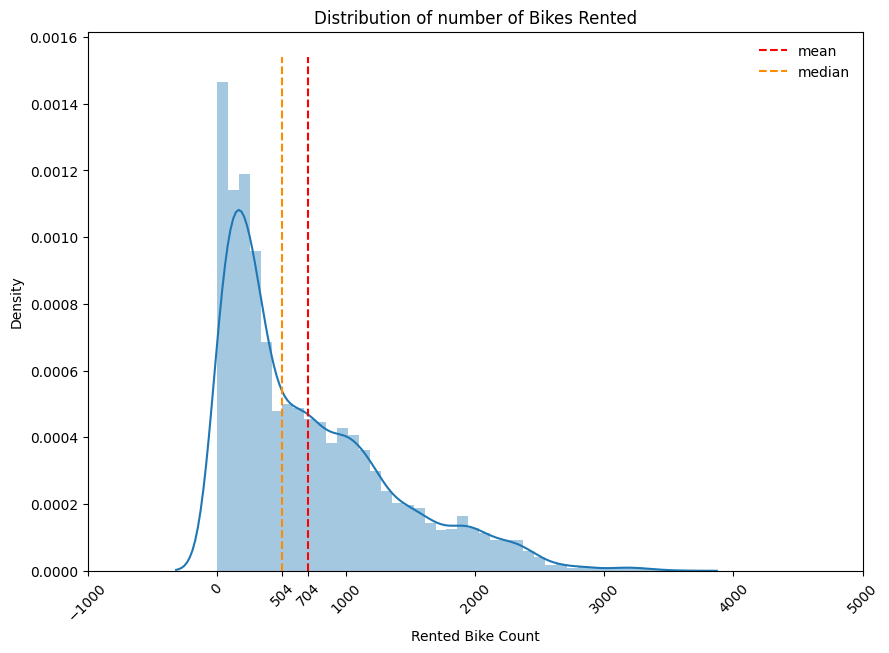

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10,7))
ax = sns.distplot(df['Rented Bike Count'])
plt.title('Distribution of number of Bikes Rented')
ymin,ymax=ax.get_ylim()
plt.vlines(df['Rented Bike Count'].mean(),ymin,ymax,color='red',ls='--',label='mean')
plt.vlines(df['Rented Bike Count'].median(),ymin,ymax,color='darkorange',ls='--',label='median')
xticks=[*ax.get_xticks(),df['Rented Bike Count'].mean(),df['Rented Bike Count'].median()]
xticklabels=[*ax.get_xticklabels(),int(df['Rented Bike Count'].mean()),int(df['Rented Bike Count'].median())]
ax.set_xticks(xticks,labels=xticklabels,rotation=45)
ax.legend(frameon=False);

##### 1. Why did you pick the specific chart?

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.

##### 2. What is/are the insight(s) found from the chart?

The above distribution has mean(704) and median(504). The distribution is also slightly skewed to right

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The figure is only to see the distribution of the variable and does not give whole in depth analysis.

#### Chart - 2 Univariate distribution and boxplots of numeric variables

<Figure size 640x480 with 0 Axes>

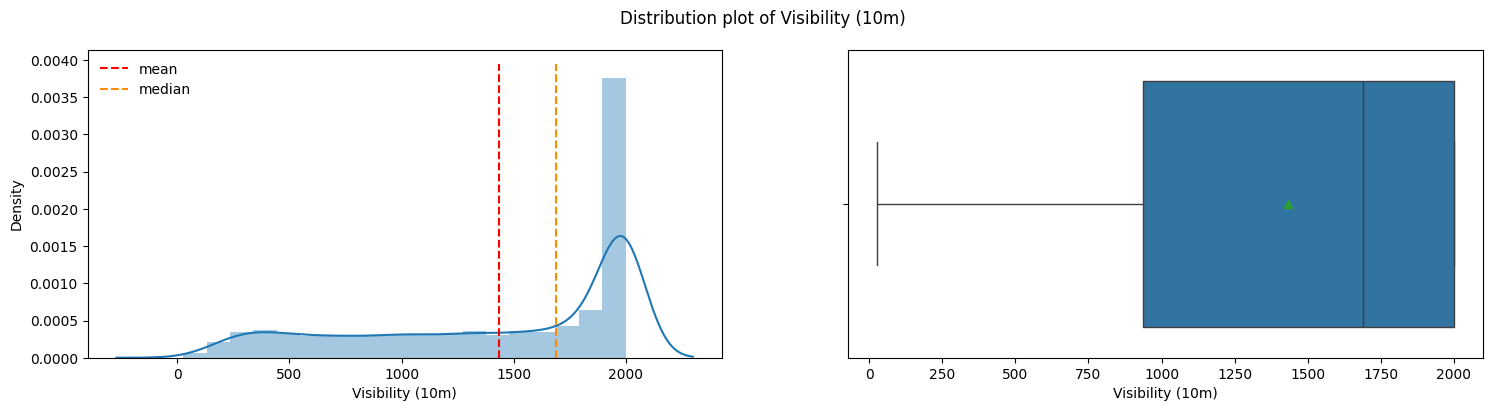

<Figure size 640x480 with 0 Axes>

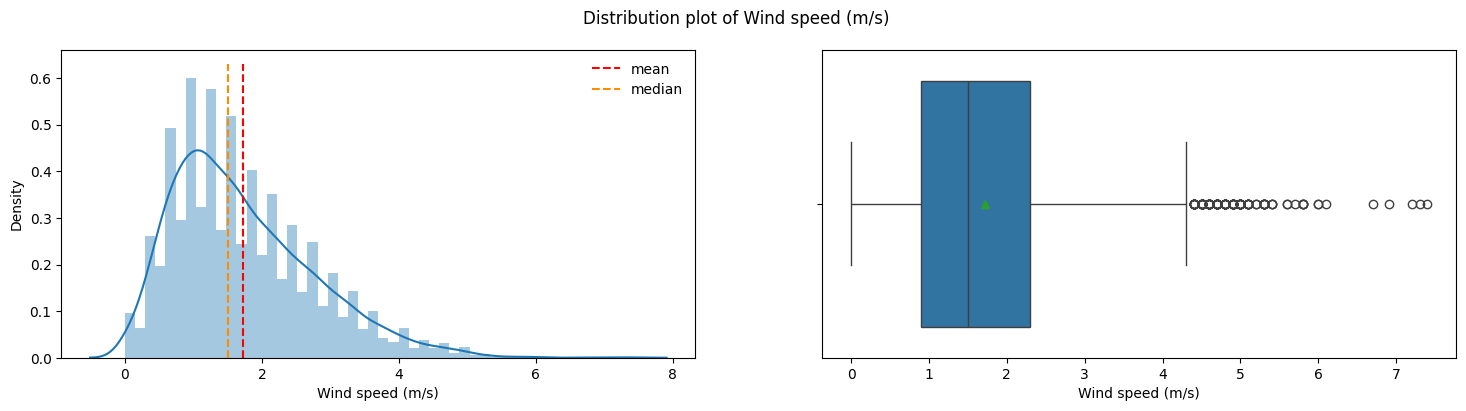

<Figure size 640x480 with 0 Axes>

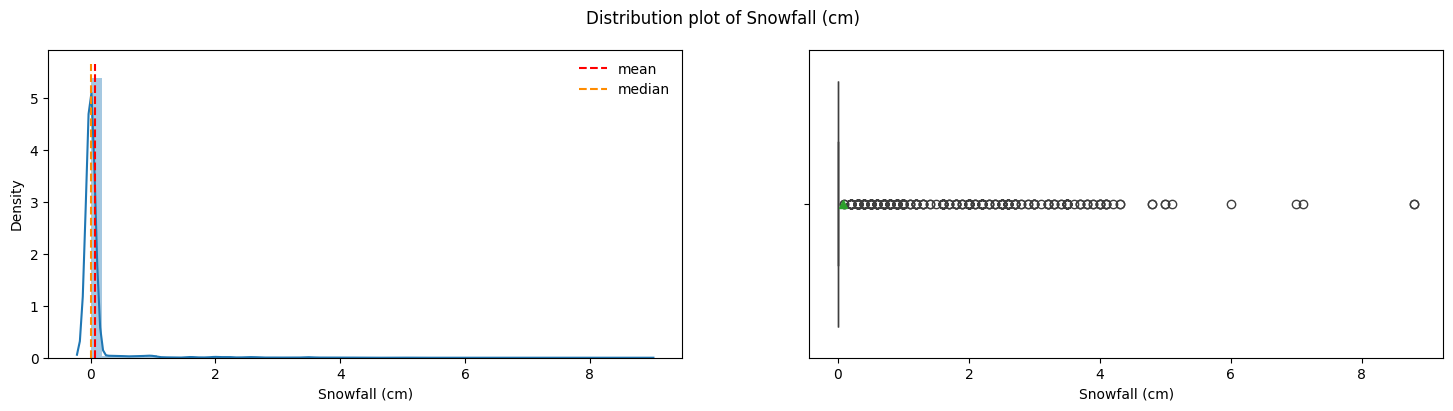

<Figure size 640x480 with 0 Axes>

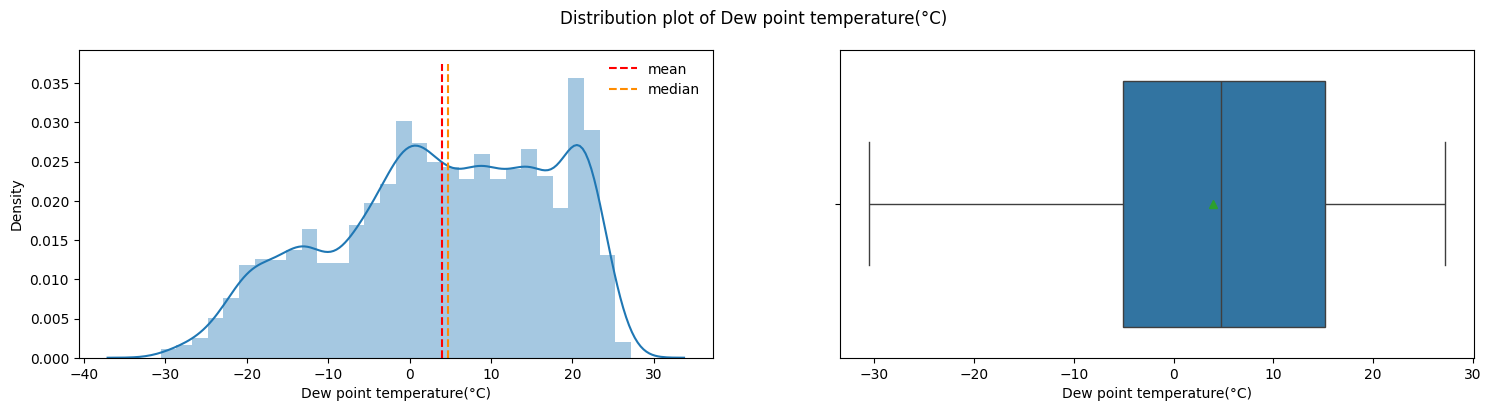

<Figure size 640x480 with 0 Axes>

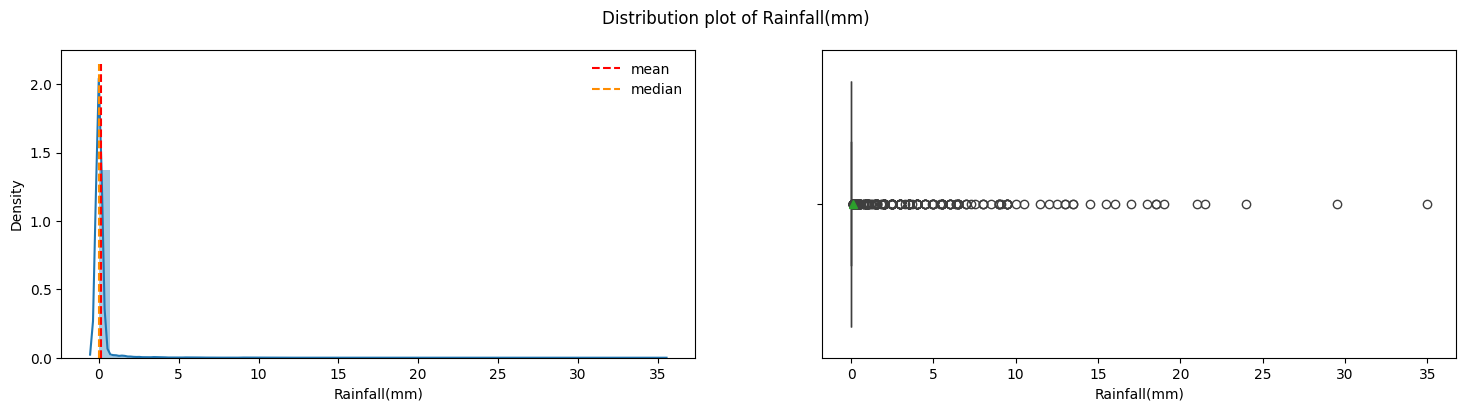

<Figure size 640x480 with 0 Axes>

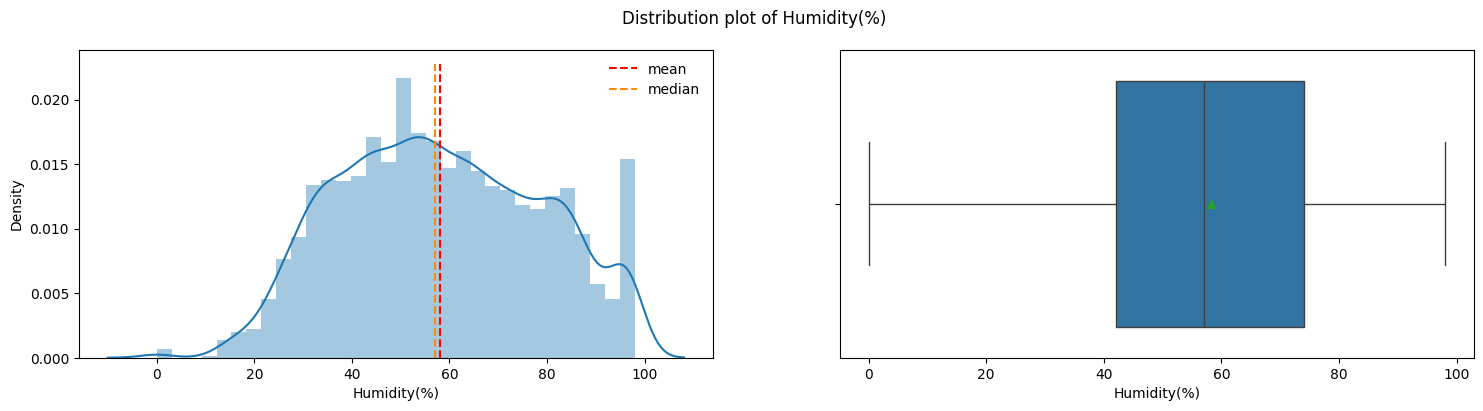

<Figure size 640x480 with 0 Axes>

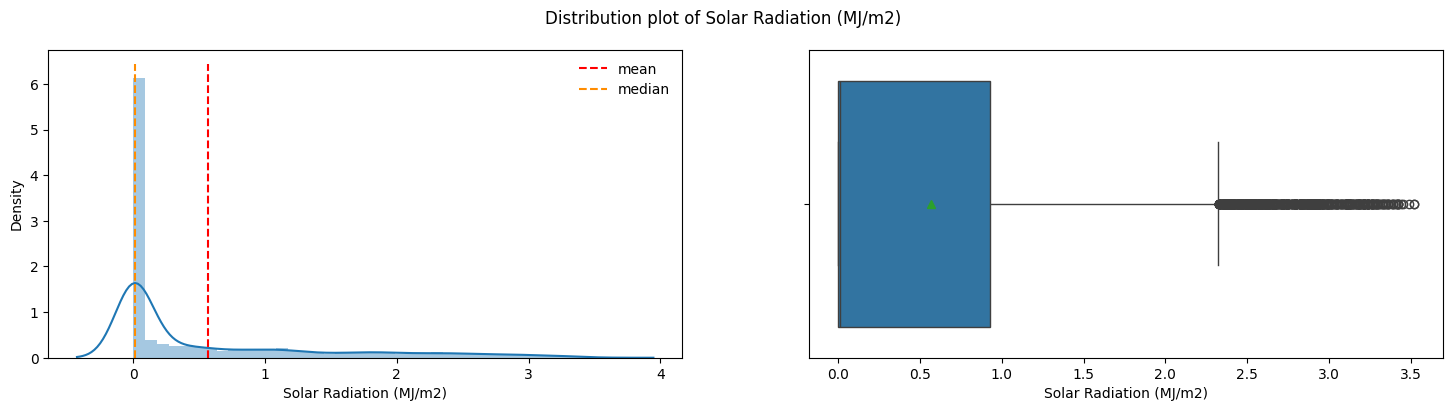

<Figure size 640x480 with 0 Axes>

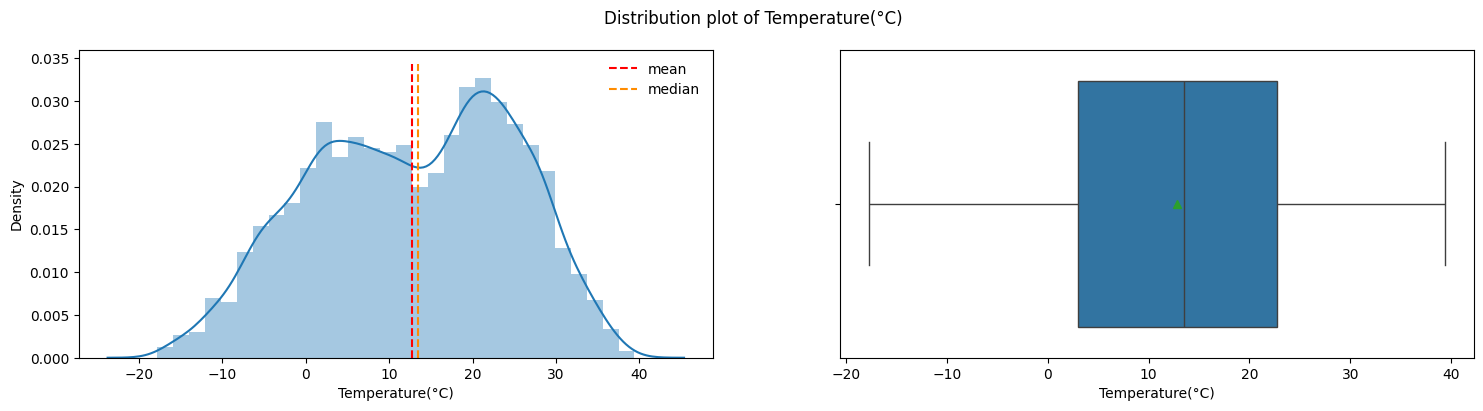

In [ ]:
# Chart - 2 visualization code
for col in set(df2.describe().columns)-{'Date','Rented Bike Count','Hour',}:
  plt.figure()
  fig,axes = plt.subplots(1,2,figsize=(18,4));
  ax=sns.distplot(df2[col],ax=axes[0]);
  ymin,ymax = ax.get_ylim()
  ax.vlines([df2[col].mean()],ymin,ymax,color=['red'],label='mean',linestyles='--')
  ax.vlines(df2[col].median(),ymin,ymax,color=['darkorange'],label='median',linestyles='--')
  ax.legend(frameon=False)
  sns.boxplot(df2[col],ax=axes[1],showmeans=True,orient='h');
  fig.suptitle(f'Distribution plot of {col}');

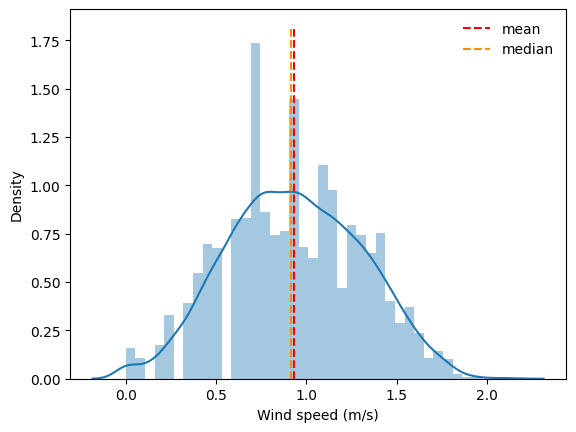

In [ ]:
# transforming the wind speed to more normal distribution
ax=sns.distplot(np.log1p(df2['Wind speed (m/s)']))
ymin,ymax = ax.get_ylim()
ax.vlines([np.log1p(df2['Wind speed (m/s)']).mean()],ymin,ymax,color=['red'],label='mean',linestyles='--')
ax.vlines(np.log1p(df2['Wind speed (m/s)']).median(),ymin,ymax,color=['darkorange'],label='median',linestyles='--')
ax.legend(frameon=False)

##### 1. Why did you pick the specific chart?

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. It  tells us if some of the feature need transformation eg(log transformation, square root transformation etc)

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups

##### 2. What is/are the insight(s) found from the chart?

The above charts show distribution of rest of independent features by distplot and boxplots. It shows that rainfall and snowfall have outliers but cannot be removes as they are seasonal phenomenon and do affect the result. The log transformation makes the data more normal, but rainfall and snowfall affect the demand more and are more seasonal phenomenon, hence outliers are not to be treated

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The figures above is only to see the distribution of the data and does not give whole in depth analysis.

#### Chart - 3 : Bikes rented by seasons

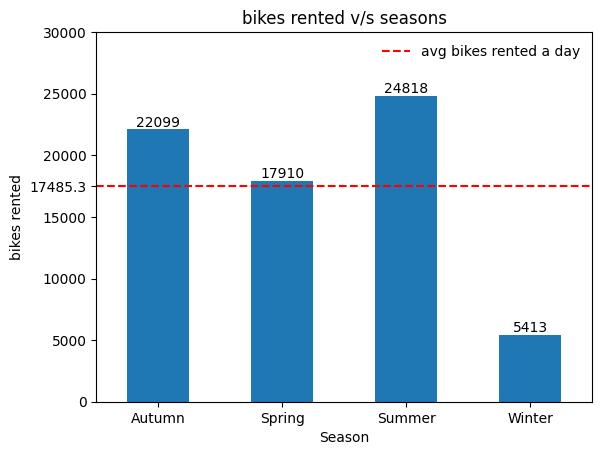

In [ ]:
# Chart - 3 visualization code
plots = bike_by_seasons['daily'].plot(kind='bar',title='bikes rented v/s seasons',xlabel='Season',ylabel='bikes rented',label='')
plt.xticks(rotation=0)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom')
plt.axhline(avg_bike,ls='--',color='red',label='avg bikes rented a day')
yticks = [*plots.get_yticks(),avg_bike]
yticklabels = [*plots.get_yticklabels(),avg_bike]
plots.set_yticks(yticks,labels=yticklabels)
plt.legend(frameon=False);

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

Above figure shows bikes rented by season and winter season has considerable decrease in bikes rented while summer and autumn were higher than averaege. Spring season had an average bike rented counts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The demand is high for summer and autumn season need higher supply.

#### Chart - 4 : Bikes Rented by weekdays

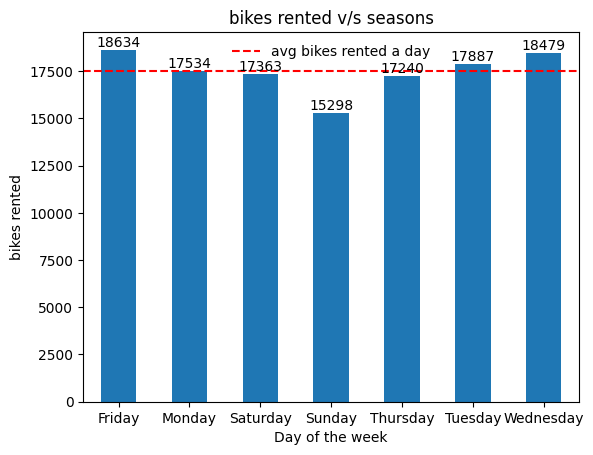

In [ ]:
#bikes rented by weekdays
plots = bike_by_weekday['Daily'].plot(kind='bar',title='bikes rented v/s seasons',xlabel='Day of the week',ylabel='bikes rented',label='')
plt.xticks(rotation=0)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom')
plt.axhline(avg_bike,ls='--',color='red',label='avg bikes rented a day')
plt.legend(frameon=False);

##### 1. Why did you pick the specific chart?

Bar chart compares values for different categories.

##### 2. What is/are the insight(s) found from the chart?

Above chart compares average count by days of the week.

Sunday have lower than average demand, Friday and Wednesday have higher demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart represent the quantitative values for the demand and hence supply needed for it.

#### Chart - 5 : Bikes rented by holidays

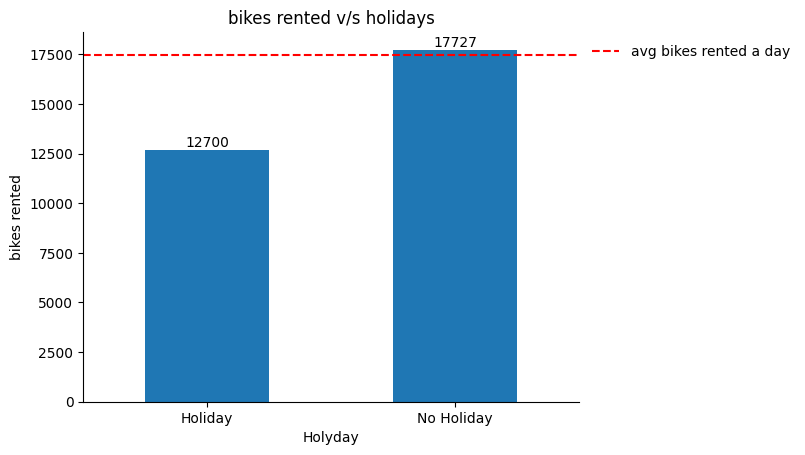

In [ ]:
# Chart - 5 bikes rented by holidays
plots = bike_by_holidays['daily'].plot(kind='bar',title='bikes rented v/s holidays',xlabel='Holyday',ylabel='bikes rented',label='')
plt.xticks(rotation=0)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom')
plt.axhline(avg_bike,ls='--',color='red',label='avg bikes rented a day')
plt.legend(frameon=False,bbox_to_anchor=(1,1))
plots.spines['top'].set_visible(False)
plots.spines['right'].set_visible(False);

##### 1. Why did you pick the specific chart?

Bar chart are simple chart with bars and helps compares values for different categories.

##### 2. What is/are the insight(s) found from the chart?

The bike demand comes down on holidays as average demand on no holidays is 17700 and on holidays it it 12700

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The main segment of people using rented bikes might be of daily working people.

#### Chart - 6 : Bikes rented hourly by seasons

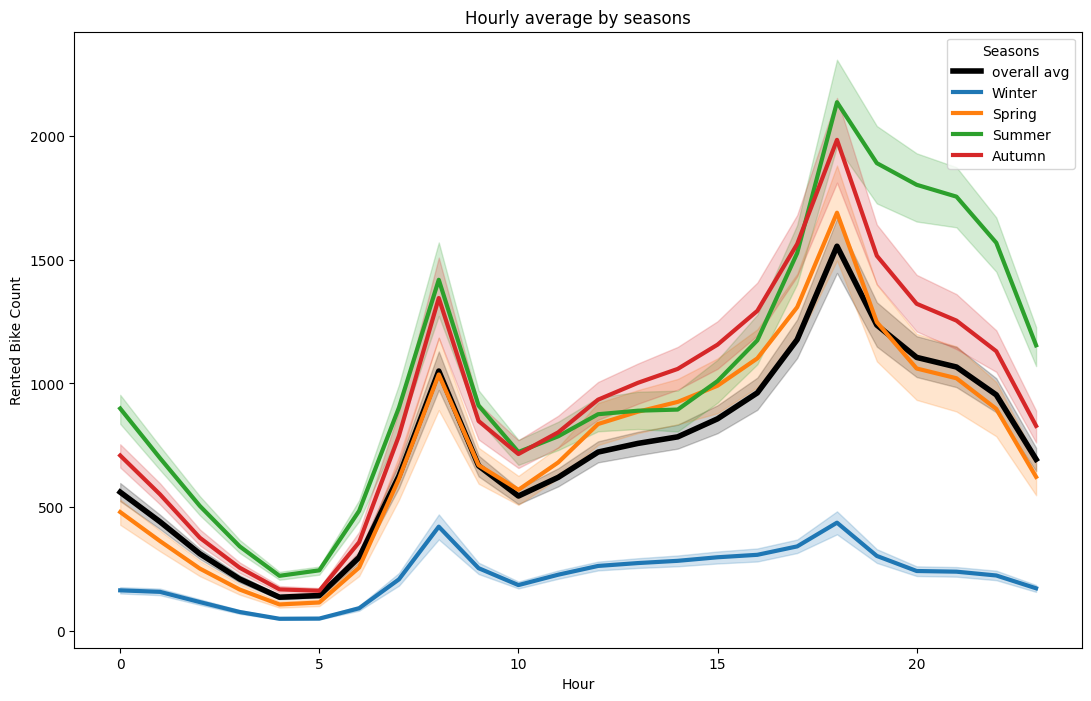

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(13,8))
sns.lineplot(x='Hour',y='Rented Bike Count',data=df2,label='overall avg',color='black',lw=4)
sns.lineplot(x='Hour',y='Rented Bike Count',data=df2,hue='Seasons',lw=3)
plt.title('Hourly average by seasons');

##### 1. Why did you pick the specific chart?

Line graphs are used to track changes over short and long periods of time.

##### 2. What is/are the insight(s) found from the chart?

In the above figure we have used line chart to track change during the hour of the day for seasons. As expected winters have least demand throughout the day.

The most demand is during morning(7-9) and evening(17-20) hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart encourages the demand being helped by working people.

#### Chart - 7 : Bikes rented hourly by weekdays

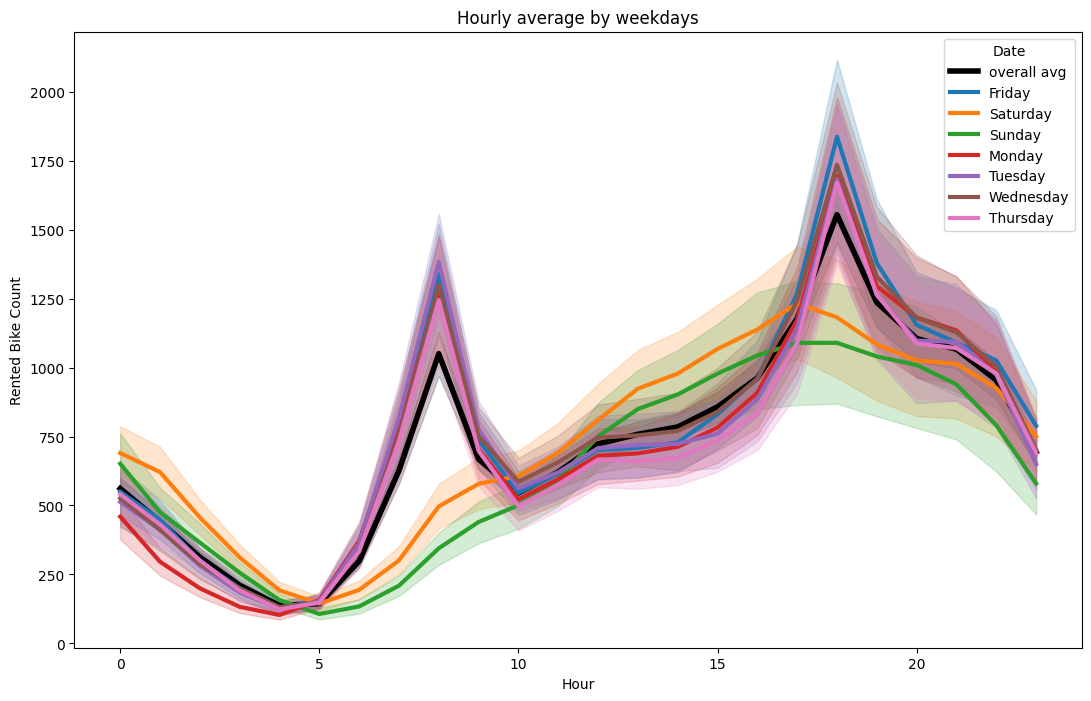

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(13,8))
sns.lineplot(x='Hour',y='Rented Bike Count',data=df2,label='overall avg',color='black',lw=4)
sns.lineplot(x='Hour',y='Rented Bike Count',data=df2,lw=3,hue=df2['Date'].dt.day_name())
plt.title('Hourly average by weekdays');

##### 1. Why did you pick the specific chart?

Line graphs are used to track changes over short and long periods of time.
Here we track changes during the hour of the day for different weekdays.

##### 2. What is/are the insight(s) found from the chart?

The demand drops for Saturdays and Sundays while the busiest hours are 8-9(morning) and 17-19(evening).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart shows how the supply should be for better business growth.

#### Chart - 8 : Bike rented hourly by holidays

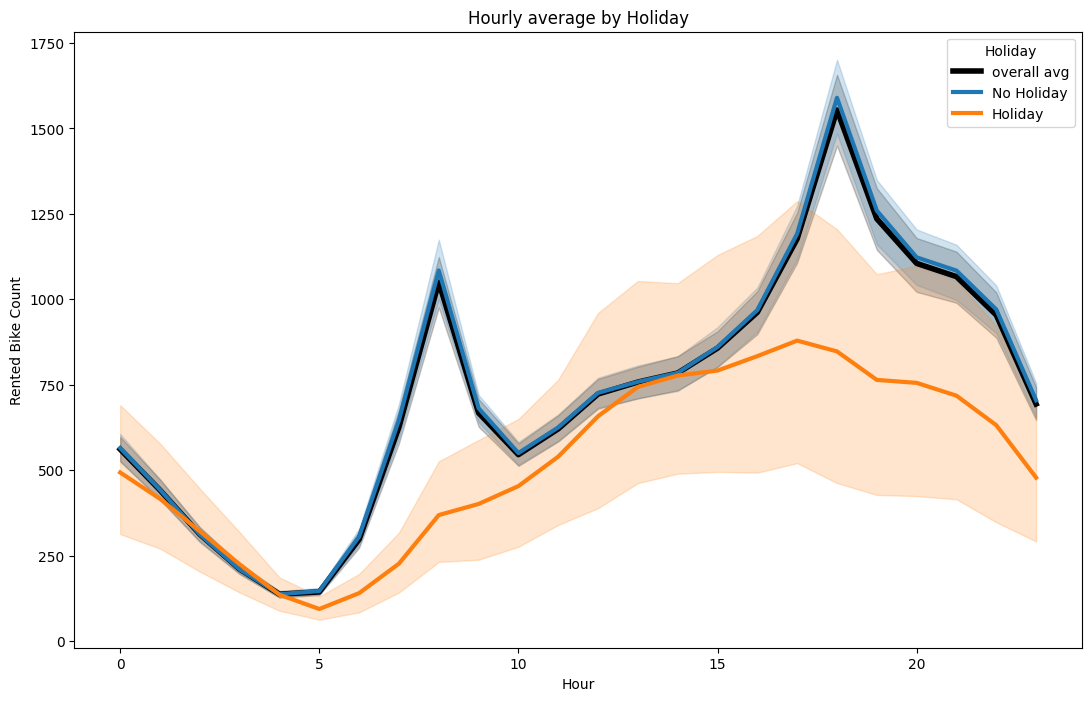

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(13,8))
sns.lineplot(x='Hour',y='Rented Bike Count',data=df2,label='overall avg',color='black',lw=4)
sns.lineplot(x='Hour',y='Rented Bike Count',data=df2,hue='Holiday',lw=3)
plt.title('Hourly average by Holiday');

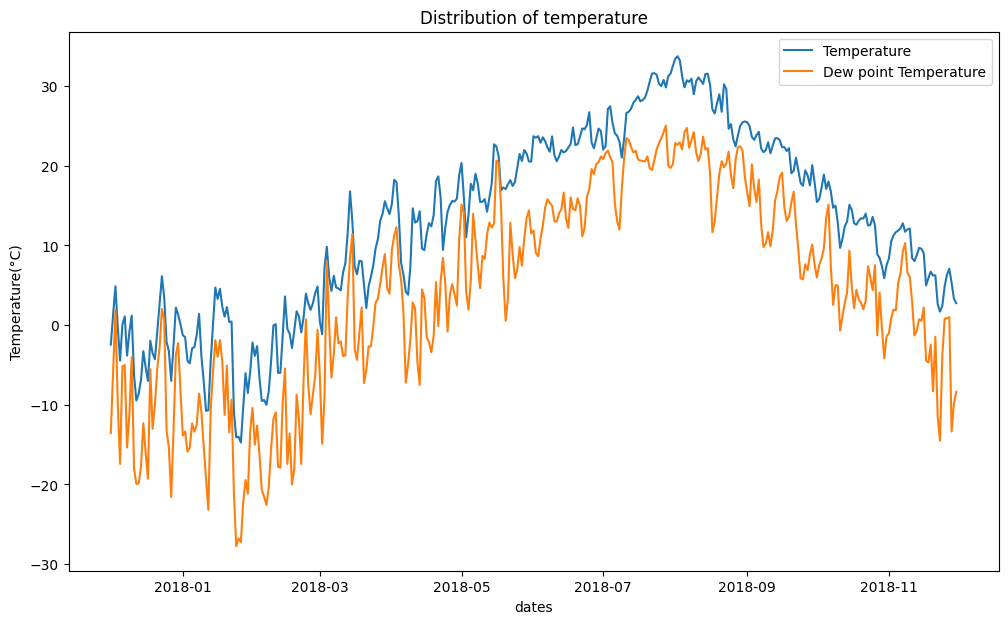

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(12,7))
plt.plot(df.groupby(df['Date'])['Temperature(°C)'].mean(),label='Temperature')
plt.plot(df.groupby(df['Date'])['Dew point temperature(°C)'].mean(),label='Dew point Temperature')
plt.xlabel('dates')
plt.title('Distribution of temperature')
plt.ylabel('Temperature(°C)')
plt.legend();

##### 1. Why did you pick the specific chart?

Line graphs are used to track changes over short and long periods of time. Here we chart changes during hour of the day by holidays.

##### 2. What is/are the insight(s) found from the chart?

Here it shows again the working days have same demand timings for the day while no holidays have demand increase gradually till evening where it reaches maximum and then starts decreasing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The major demand on a working day is during the working hours and especially increases during the start and end of the wroking hours.

#### Chart - 9 : Avg bikes rented daily by weekdays for Seasons

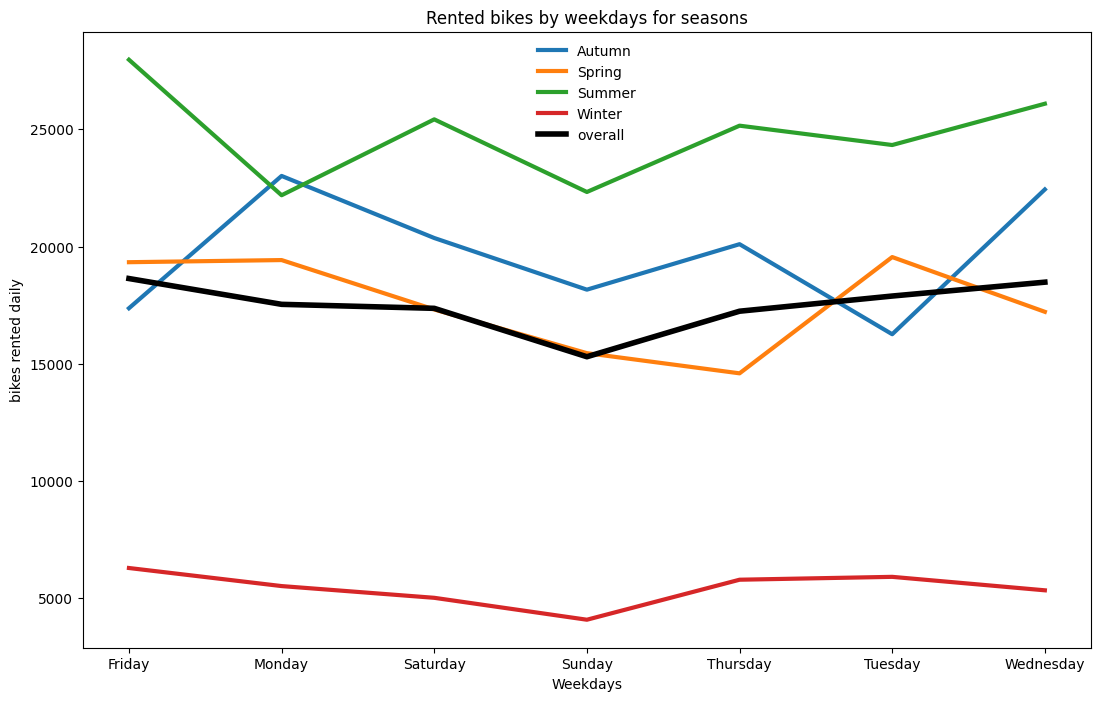

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(13,8))
sns.lineplot(x='Weekday',y='bikes rented daily',data=bike_by_weekday_season.reset_index(['Weekday','Seasons']),hue='Seasons',lw=3)
sns.lineplot(x=bike_by_weekday.index.rename('Weekday'),y=bike_by_weekday['Daily'],color='black',lw=4,label='overall')
plt.title('Rented bikes by weekdays for seasons')
plt.xlabel('Weekdays')
plt.legend(frameon=False);

##### 1. Why did you pick the specific chart?

Line graphs are used to track changes over short and long periods of time.
Here we track change of average demand by weekdays.

##### 2. What is/are the insight(s) found from the chart?

Summer and Autumn have more demand than average while spring is the average and during winters it decreases drastically.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The demand is strongly influenced by working days as demand is lower for saturdays and sundays as compared to rest of the weekdays.




#### Chart - 10 : Total Bikes rented by daytime

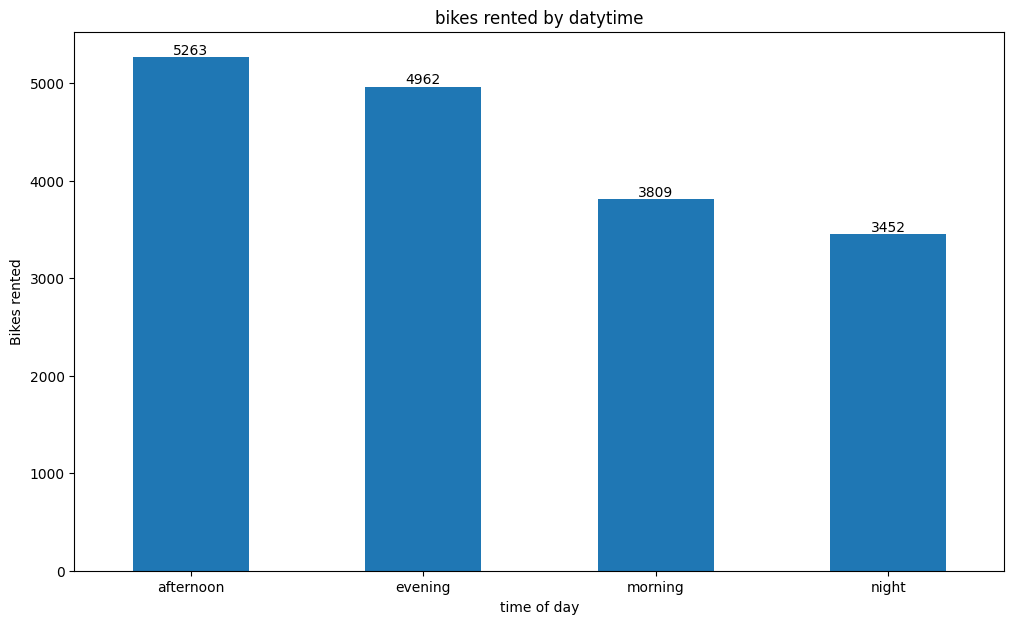

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(12,7))
plots = bike_by_daytime['Daily'].plot(kind='bar')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom')
plt.xticks(rotation=0)
plt.xlabel('time of day')
plt.title('bikes rented by datytime')
plt.ylabel('Bikes rented');

##### 1. Why did you pick the specific chart?

Bar chart are easy way to compare the values of different categories. It is simple and easy to interpret.

##### 2. What is/are the insight(s) found from the chart?

The highest demand is for afternoon and evening than mornings and lowest demand is for night time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It gives the roadmap for demand during the weekdays and maintence of the bikes.

#### Chart - 11 : Bikes rented hourly by time of the day

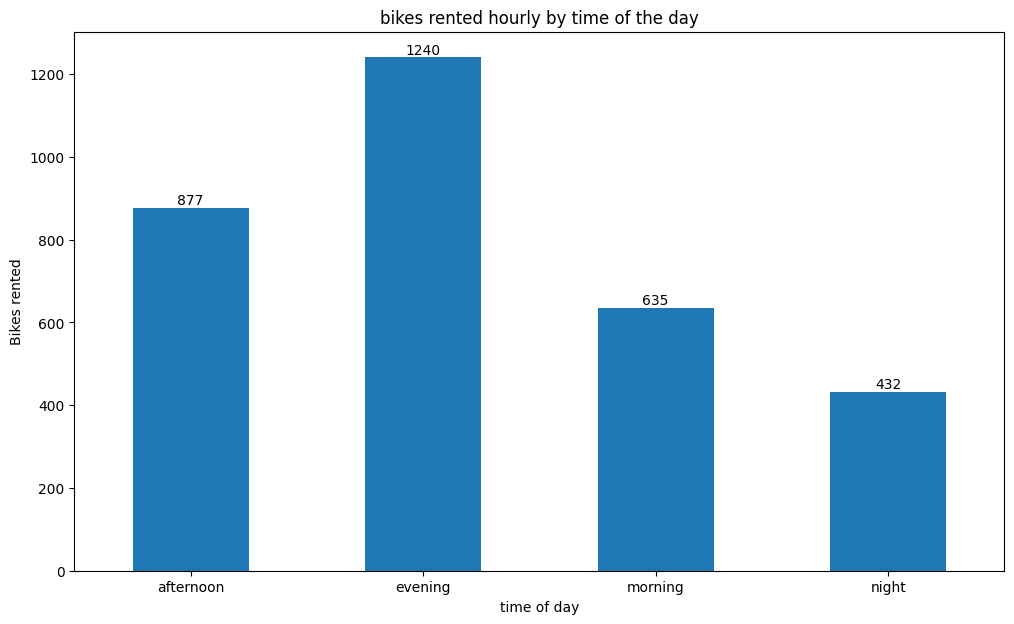

In [ ]:
plt.figure(figsize=(12,7))
plots = bike_by_daytime['Hourly'].plot(kind='bar')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom')
plt.xticks(rotation=0)
plt.xlabel('time of day')
plt.title('bikes rented hourly by time of the day')
plt.ylabel('Bikes rented');

##### 1. Why did you pick the specific chart?

Bar chart are easy way to compare the values of different categories. It is simple and easy to interpret.

##### 2. What is/are the insight(s) found from the chart?

The above chart shows hourly demand during different times of the day. Highest being for eveinng and afternoon and least being for night.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It again shows the demand-supply chart for the business growth.

#### Chart - 14 - Correlation Heatmap

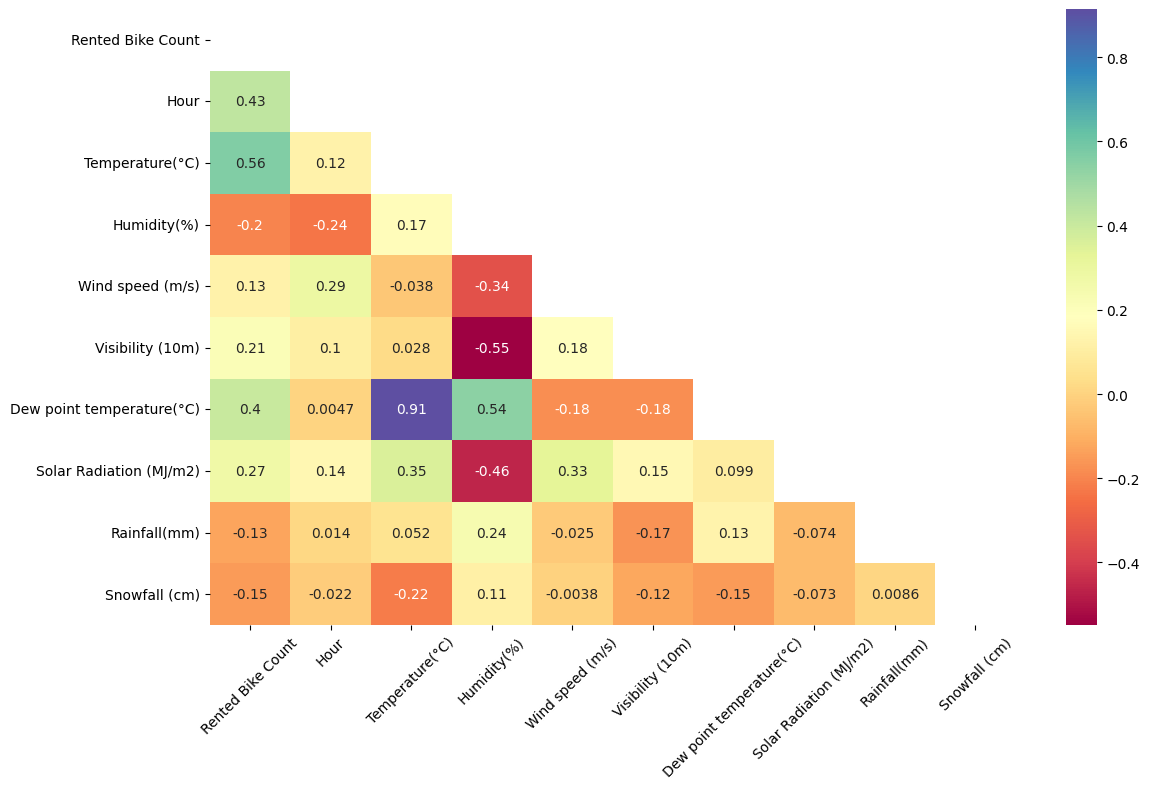

In [ ]:
# Correlation Heatmap visualization code
corr=df2.corr(numeric_only=True)
mask=np.triu(corr)
plt.figure(figsize=(13,8))
sns.heatmap(df2.corr(numeric_only=True),cmap='Spectral',annot=True,mask=mask)
plt.xticks(rotation=45);

##### 1. Why did you pick the specific chart?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

##### 2. What is/are the insight(s) found from the chart?

Dew Point temperature and temperature are highly correlated with coefficient of .91. For rest of the variables correlation was not very high but also no variables had 0 correlation

#### Chart - 15 - Pair Plot

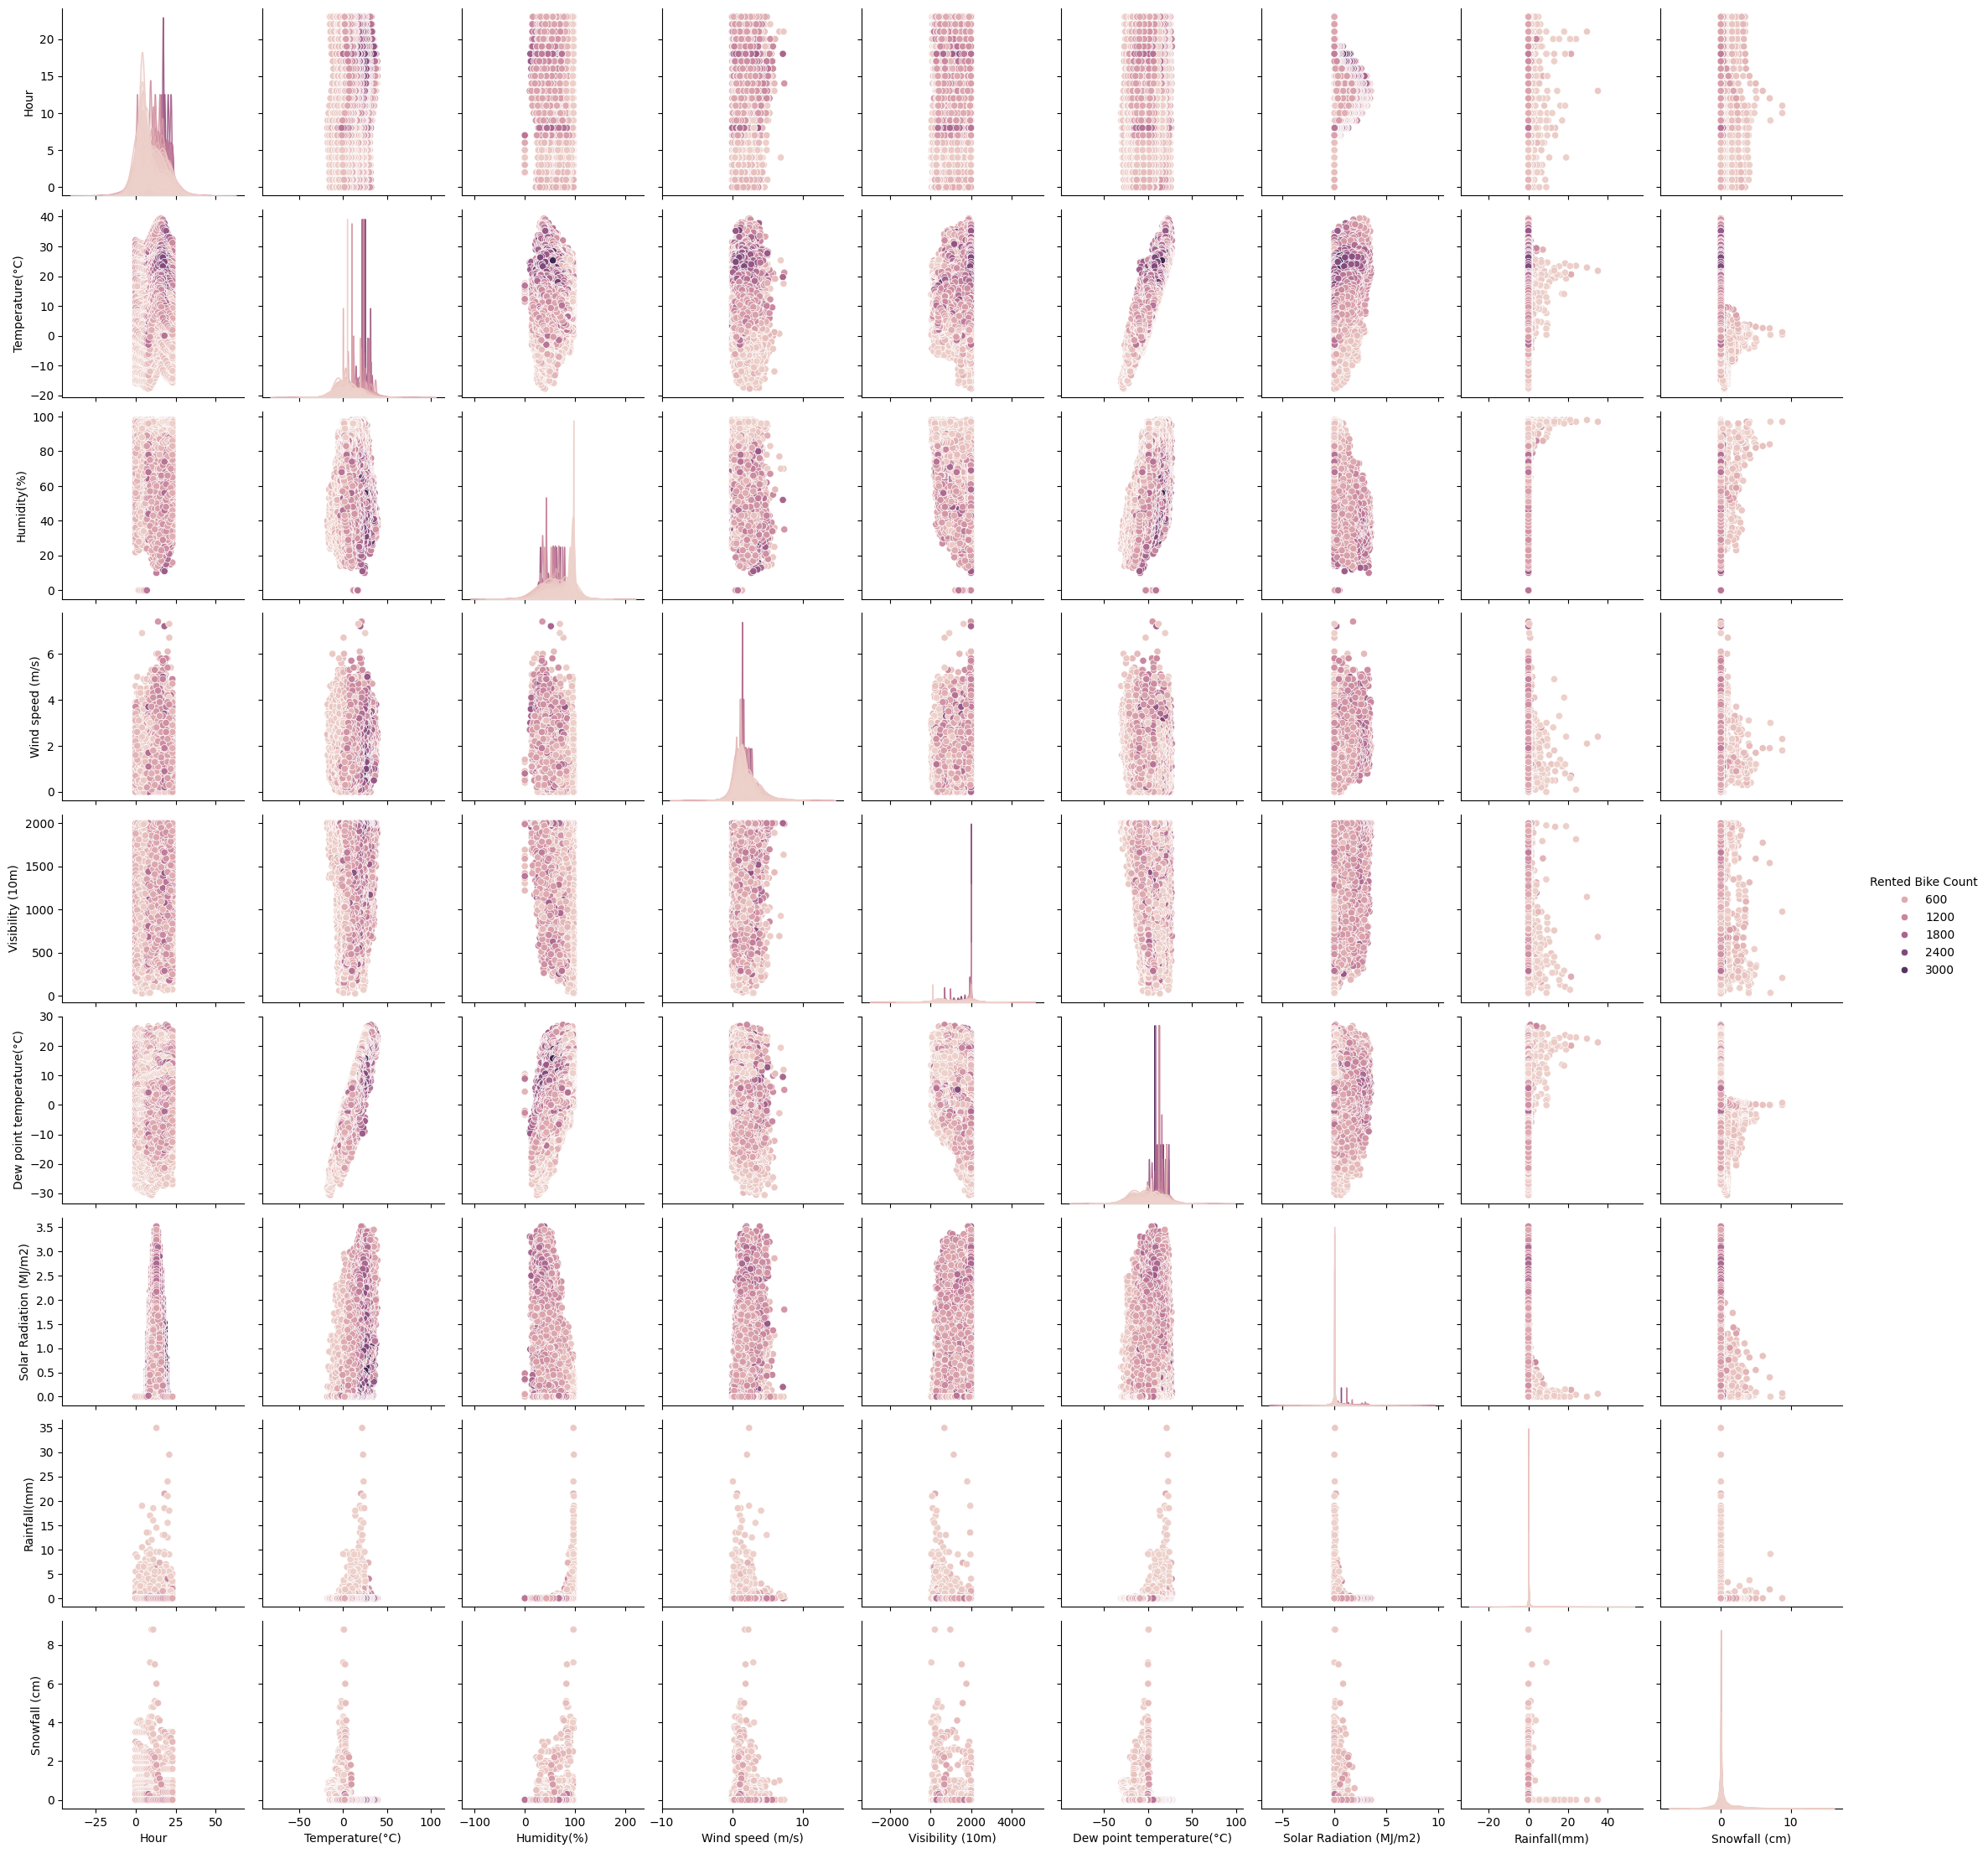

In [ ]:
# Pair Plot visualization code
plt.figure(figsize=(20,12))
sns.pairplot(df2,hue='Rented Bike Count');

##### 1. Why did you pick the specific chart?

A pair plot, also known as a scatterplot matrix, is a matrix of graphs that enables the visualization of the relationship between each pair of variables in a dataset. It combines both histogram and scatter plots, providing a unique overview of the dataset's distributions and correlations.

##### 2. What is/are the insight(s) found from the chart?

The above plots show relationship between the features of the dataset.

## ***Feature Engineering & Data Pre-processing***

###  Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df2.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Time of day                  0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

No missing values are there in dataset.

###  Categorical Encoding

In [ ]:
# look at the data to encode
df2

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-12-01                254     0             -5.2           37   
1    2017-12-01                204     1             -5.5           38   
2    2017-12-01                173     2             -6.0           39   
3    2017-12-01                107     3             -6.2           40   
4    2017-12-01                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day Time of day  
0     No Holiday             Yes       night  
1     No Holiday             Yes       night  
2     No Holiday             Yes       night  
3     No Holiday             Yes       night  
4     No Holiday             Yes       night  
...          ...             ...         ...  
8755  No Holiday             Yes     evening  
8756  No Holiday             Yes     evening  
8757  No Holiday             Yes     evening  
8758  No Holiday             Yes       night  
8759  No Holiday             Yes       night  

[8465 rows x 15 columns]

In [ ]:
#creating new features for dates and encoding holiday and functioning day features to 0 and 1 as it can be seen as presence or absence hence True and False
df2['Day Name'] = df2['Date'].dt.day_name()
df2 = df2.replace({'Yes':1,
               'No':0,
               'Holiday':1,
               'No Holiday':0})
df2.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0          1.163151              2000                      -17.6   
1          0.587787              2000                      -17.6   
2          0.693147              2000                      -17.7   
3          0.641854              2000                      -17.6   
4          1.193922              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  Holiday  \
0                      0.0           0.0            0.0  Winter        0   
1                      0.0           0.0            0.0  Winter        0   
2                      0.0           0.0            0.0  Winter        0   
3                      0.0           0.0            0.0  Winter        0   
4                      0.0           0.0            0.0  Winter        0   

   Functioning Day Time of day Day Name  
0                1       night   Friday  
1                1       night   Friday  
2                1       night   Friday  
3                1       night   Friday  
4                1       night   Friday

In [ ]:
# Encode your categorical columns by creating dummy variables as there is no order in rest of cat features
#like winter,summer do not have a value based order just there presence or absence
df2 = pd.get_dummies(df2,drop_first=True,dtype=float)

<Axes: >

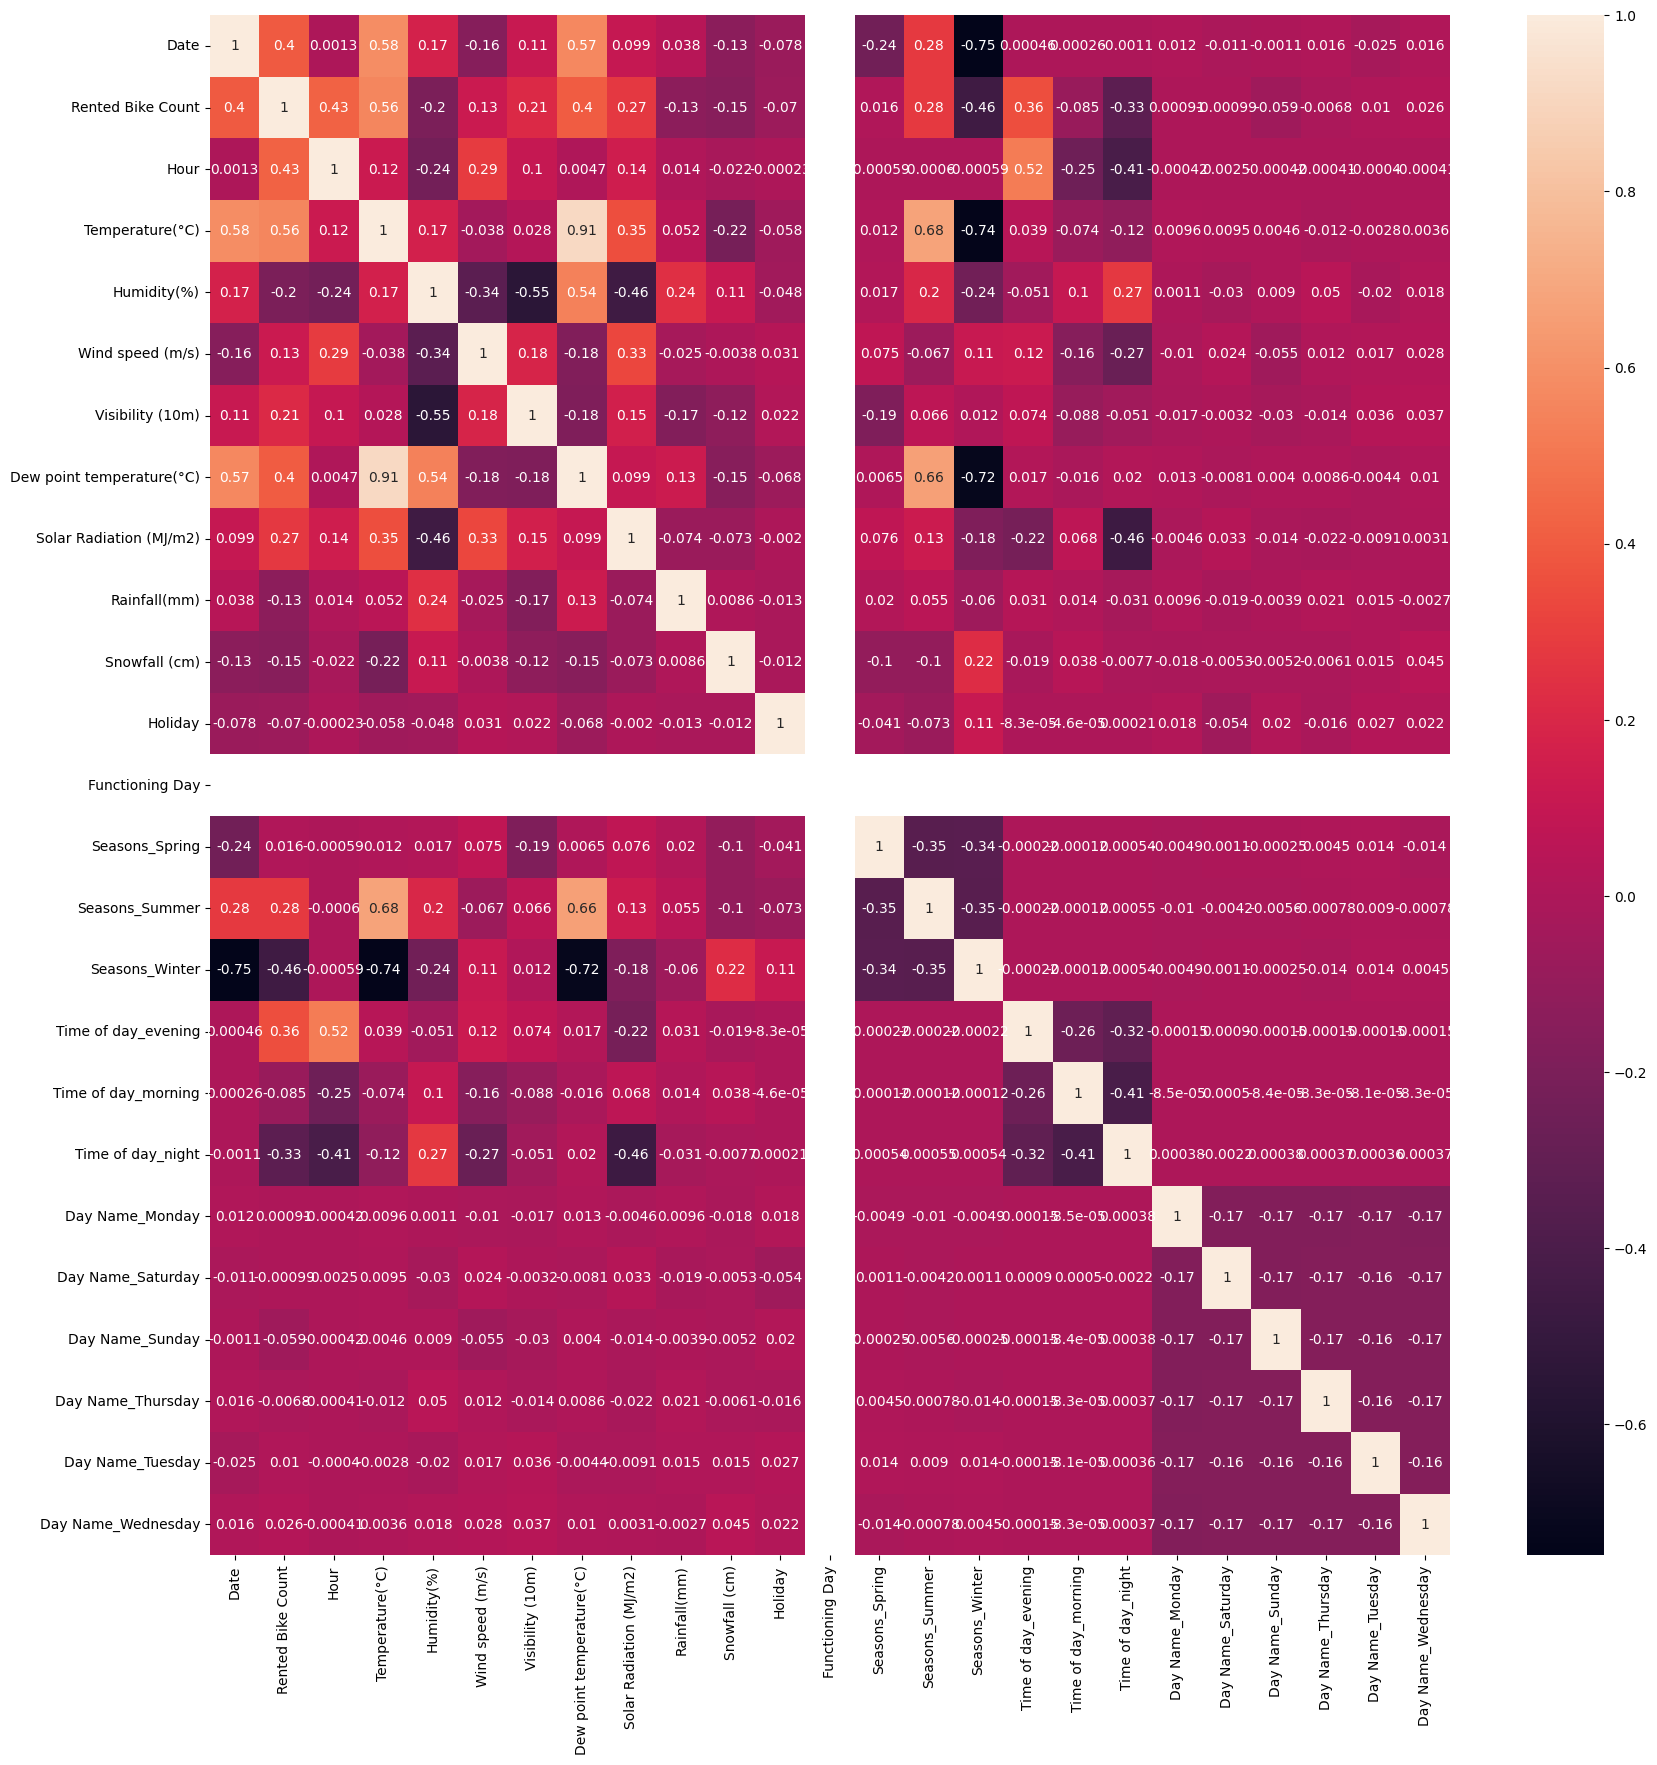

In [ ]:
#heatmap now again
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),annot=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?


There were 3 columns of Object dtypes or categorical columns.


###  Feature Manipulation & Selection and Transformation

####  Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
def get_vif(data):
  vif = pd.DataFrame()
  vif['features'] = data.columns
  vif['VIF']=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
  return vif

In [ ]:
# variance influence factor for the data
get_vif(df2.drop(['Date'],axis=1))

features         VIF
0           Rented Bike Count    2.416891
1                        Hour    1.887843
2             Temperature(°C)   93.579089
3                 Humidity(%)   20.873192
4            Wind speed (m/s)    1.367058
5            Visibility (10m)    1.727458
6   Dew point temperature(°C)  120.922663
7     Solar Radiation (MJ/m2)    3.119644
8                Rainfall(mm)    1.127121
9               Snowfall (cm)    1.125841
10                    Holiday    1.033742
11            Functioning Day  447.307184
12             Seasons_Spring    1.757821
13             Seasons_Summer    2.714559
14             Seasons_Winter    3.574185
15        Time of day_evening    2.410606
16        Time of day_morning    2.316145
17          Time of day_night    3.507201
18            Day Name_Monday    1.734362
19          Day Name_Saturday    1.719123
20            Day Name_Sunday    1.731735
21          Day Name_Thursday    1.711072
22           Day Name_Tuesday    1.693482
23         Day Name_Wednesday    1.718428

In [ ]:
#vif after removing features with higher variance inflation factor
get_vif(df2.drop(['Date','Dew point temperature(°C)','Humidity(%)','Rented Bike Count','Functioning Day'],axis=1))

features       VIF
0                      Hour  5.871171
1           Temperature(°C)  9.177744
2          Wind speed (m/s)  4.894333
3          Visibility (10m)  6.651243
4   Solar Radiation (MJ/m2)  3.455348
5              Rainfall(mm)  1.056988
6             Snowfall (cm)  1.111498
7                   Holiday  1.081323
8            Seasons_Spring  2.132372
9            Seasons_Summer  3.555706
10           Seasons_Winter  3.504502
11      Time of day_evening  2.610644
12      Time of day_morning  1.988241
13        Time of day_night  3.445008
14          Day Name_Monday  1.870261
15        Day Name_Saturday  1.869609
16          Day Name_Sunday  1.838958
17        Day Name_Thursday  1.820599
18         Day Name_Tuesday  1.836445
19       Day Name_Wednesday  1.870436

##### What all feature selection methods have you used  and why?

We have used variance influence factor to check for the correlation between the variables to remove feature that contribute to most correlation.

A VIF value of between 0-5 is a good value while a value of 5-10 is considered okay.

If VIF value is more than 10 is not acceptable to linear regression models.

##### Which all features you found important and why?

We will remove features such as 'Date','Dew point temperature(°C)','Humidity(%)','Day Name'

###  Data Transformation and Splitting

In [ ]:
# Transform Your data for wind speed variable
df2['Wind speed (m/s)']=np.log1p(df2['Wind speed (m/s)'])

In [ ]:
#data after removing multicolinearity
X = df2.drop(['Date','Dew point temperature(°C)','Humidity(%)','Rented Bike Count','Functioning Day'],axis=1)
y=df2['Rented Bike Count']

In [ ]:
#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print('X_train test set shape: ',X_train.shape)
print('X_test set shape: ',X_test.shape)
print('y_train test set shape: ',y_train.shape)
print('y_test set shape: ',y_test.shape)

X_train test set shape:  (6772, 20)
X_test set shape:  (1693, 20)
y_train test set shape:  (6772,)
y_test set shape:  (1693,)


##### What data splitting ratio have you used and why?

Training a Machine Learning model is impossible without data splitting because you need to validate your model on unseen data, which can be easily obtained only if you split the original dataset into several subsets.

Here we have standard 80-20% splitting ratio meaning 20% of the data will be used for the test set, and the remaining 80% for the training set.

###  Data Scaling

In [ ]:
# Scaling your data
minmax_scaler = MinMaxScaler()
X_train = minmax_scaler.fit_transform(X_train)
X_test=minmax_scaler.transform(X_test)

##### Which method have you used to scale you data and why?

Here we have used **MinMaxScaler** to scale the data.

It standardizes features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between **zero and one**. It reduces **overfitting** on the features with highest absolute valued variables.

## ***ML Model Implementation***

### ML Model - 1

In [ ]:
#Dictionary of all predictins of the target variable
y_preds={}
report={}

#fucntion to implement the model and fit the data
def model_implement(model,x_train,y_train,x_test,y_test):
  model=model
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print('model: ',model)
  mse=mean_squared_error(y_test,y_pred)
  mae=mean_absolute_error(y_test,y_pred)
  r2_value = r2_score(y_test,y_pred)
  rmse=np.sqrt(mean_squared_error(y_test,y_pred))
  adjusted_r2_score=get_adjusted_r2(X_test,r2_value)
  y_preds[str(model)]=y_pred
  report[str(model)]={'mse':mse,
                    'mae':mae,
                    'rmse':rmse,
                    'r2_score':r2_value,
                    'adjusted_r2_score':adjusted_r2_score}

#function to get adjusted r2 score
def get_adjusted_r2(X_test,r2):
  '''Get adjusted r2 score of the model by providing the X_test and r2 value'''
  adj_r2 = 1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  return adj_r2


In [ ]:
predict=pd.DataFrame()
predict['Date']=df2['Date']
def visualize_data(model,X,X_train,y_train):
    model.fit(X_train,y_train)
    predict['predictions']=model.predict(X)
    plt.figure(figsize=(9,5))
    df.groupby('Date')['Rented Bike Count'].sum().plot(kind='line',label='actual')
    predict.groupby('Date')['predictions'].sum().plot(kind='line',label='predicted')
    plt.title(f'predictions for {model}')
    plt.legend()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

## **Linear Regression**

**Linear regression** is a type of supervised machine learning algorithm that computes the linear relationship between the dependent variable and one or more independent features by fitting a linear equation to observed data.
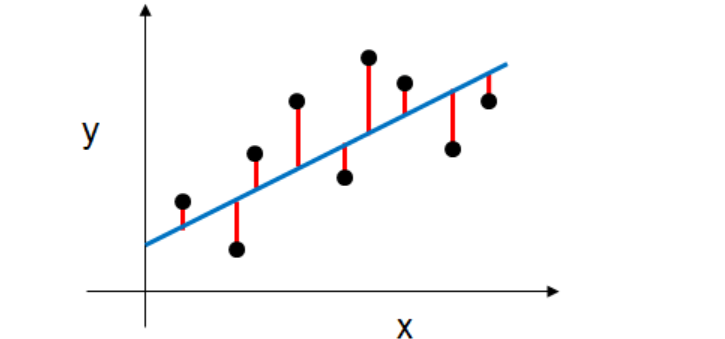

The Equation for a Linear Regression is:

Linaerequation.png

We would estimate its coefficients using the least squares criterion, which minimizes the residual sum of squares (RSS). Or graphically, we're fitting the blue line to our data (the black points) that minimizes the sum of the distances between the points and the blue line.

Mathematically,

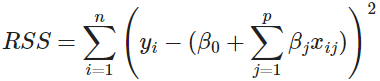

where,

* **n** is the total number of observations (data).
* ***$Y_i$*** is the actual output value of the observation (data).
* ***p*** is the total number of features.
* ***$β_j$*** is a model's coefficient.
* ***$X_{ij}$*** is the ***$i_{th}$*** observations, ***$j_{th}$*** feature value.
* ***$β_o$ + $\sumβ_jX_{ij}$*** is the predicted output for each observation

In regression with multiple independent variables, the coefficient tells you how much the dependent variable is expected to increase when that independent variable increases by one, holding all the other independent variables constant.

## **Regularized Linear Regression**


Regularized linear regression models are very similar to least squares, except that the coefficients are estimated by minimizing a slightly different objective function. we minimize the sum of RSS and a "penalty term" that penalizes coefficient size.

**Ridge Regression (or "L2 regularization") minimizes:**  RSS +  $λ\sumβ_j^2$

**Lasso Regression (or L1 regularization") minimizes:**   RSS +  $λ\sum|β_j|$

**Lasso stands for least absolute shrinkage and selection operator**

Where,

* **λ** is a tuning parameter that seeks to balance between the fit of the model to the data and the magnitude of the model's coefficients:
* A tiny **λ** imposes no penalty on the coefficient size, and is equivalent to a normal linear regression.
* Increasing **λ** penalizes the coefficients and thus shrinks them towards zero.

* **Lasso regression** shrinks coefficients all the way to zero, thus removing them from the model.
* **Ridge regression** shrinks coefficients toward zero, but they rarely reach zero.



In [ ]:
#Linear Models linear regression, lasso regression, ridge with default alpha
for model in [LinearRegression(),Lasso(),Ridge()]:
  model_implement(model=model,x_train=X_train,y_train=y_train,x_test=X_test,y_test=y_test)

model:  LinearRegression()
model:  Lasso()
model:  Ridge()


In [ ]:
Display_report = pd.DataFrame(report.values(),index=report.keys())
Display_report

mse         mae        rmse  r2_score  \
LinearRegression()  163826.885464  308.659562  404.755340  0.582698   
Lasso()             164345.538702  308.337331  405.395534  0.581377   
Ridge()             163709.706647  308.637576  404.610562  0.582997   

                    adjusted_r2_score  
LinearRegression()           0.577707  
Lasso()                      0.576370  
Ridge()                      0.578009

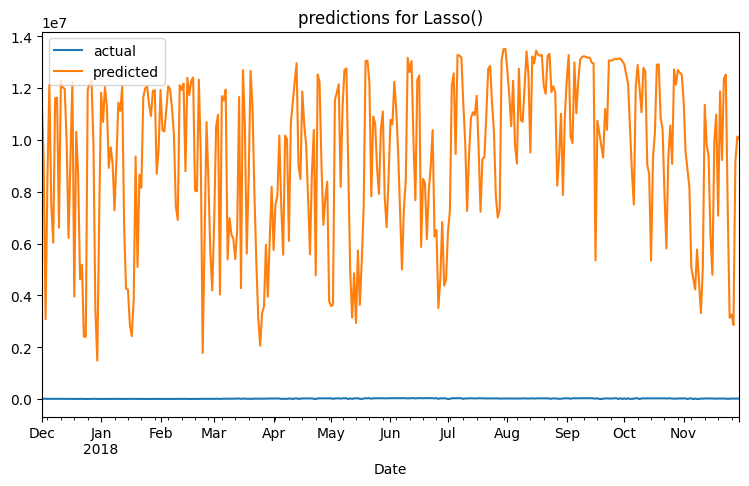

In [ ]:
visualize_data(model=Lasso(),X=X,X_train=X_train,y_train=y_train)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,1000]}
grid_lasso=GridSearchCV(estimator=Lasso(),
                  param_grid=params,
                  scoring='neg_mean_squared_error',
                  cv=5)
grid_ridge=GridSearchCV(estimator=Ridge(),
                  param_grid=params,
                  scoring='neg_mean_squared_error',
                  cv=5)

# Fit the Algorithm
grid_lasso.fit(X_train,y_train)
grid_ridge.fit(X_train,y_train)

# Predict on the model
best_lasso=grid_lasso.best_estimator_
best_ridge=grid_ridge.best_estimator_


In [ ]:
#model implementation with hyperparameter tuning:
for model in [best_lasso,best_ridge]:
  model_implement(model=model,x_train=X_train,y_train=y_train,x_test=X_test,y_test=y_test)

model:  Lasso(alpha=0.01)
model:  Ridge(alpha=1)


In [ ]:
Display_report = pd.DataFrame(report.values(),index=report.keys())
Display_report

mse         mae        rmse  r2_score  \
LinearRegression()  163826.885464  308.659562  404.755340  0.582698   
Lasso()             164345.538702  308.337331  405.395534  0.581377   
Ridge()             163709.706647  308.637576  404.610562  0.582997   
Lasso(alpha=0.01)   163813.931917  308.636740  404.739338  0.582731   
Ridge(alpha=1)      163709.706647  308.637576  404.610562  0.582997   

                    adjusted_r2_score  
LinearRegression()           0.577707  
Lasso()                      0.576370  
Ridge()                      0.578009  
Lasso(alpha=0.01)            0.577740  
Ridge(alpha=1)               0.578009

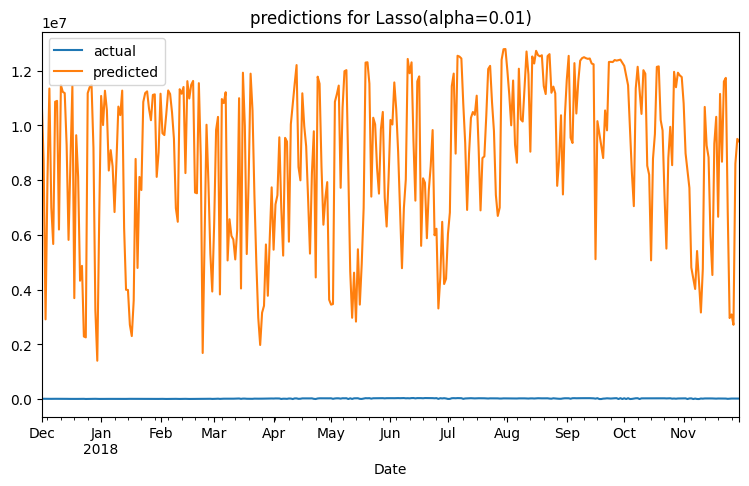

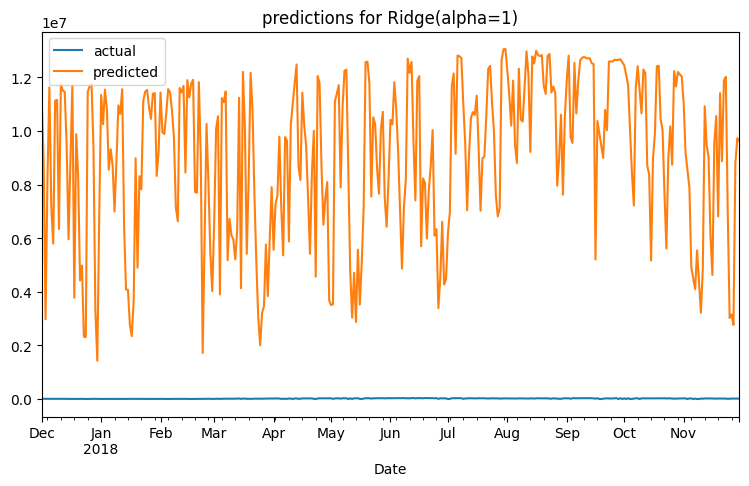

In [ ]:
for model in [best_lasso,best_ridge]:
  visualize_data(model,X,X_train,y_train)

##### Which hyperparameter optimization technique have you used and why?

**GridSearchCV** is the process of performing **hyperparameter tuning** in order to determine the **optimal** values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The metrics show that there is little or no improvement by hyperparameter tuning showing that default parameters were the best or close best

### More ML Models

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Decision tree** is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables.

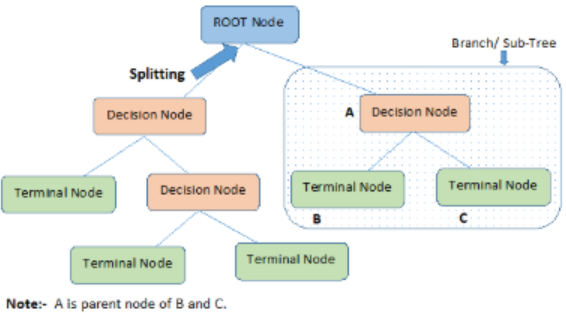

**Root Node:** It represents entire population or sample and this further gets divided into two sets.

**Splitting:** It is a process of dividing a node into two sub-nodes.

**Decision Node:** When a sub-node splits into further sub-nodes, then it is called decision node.

**Leaf/ Terminal Node:** Nodes do not split is called leaf or terminal node.

**Branch / Sub-Tree:** A sub section of entire tree is called branch or sub-tree.

**Parent and Child Node:** A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.

**How to Split**

The decision of making strategic splits heavily affects a tree’s accuracy. The decision criteria is different for classification and regression trees.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable. Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.
* Information Gain
* Gini
* Chi Square
* Reduction in Variance



In [ ]:
# fitting on ensemble tree based models
for model in [DecisionTreeRegressor()]:
  model_implement(model=model,x_train=X_train,y_train=y_train,x_test=X_test,y_test=y_test)

model:  DecisionTreeRegressor()


## **Ensemble Methods**

The literary meaning of word ‘ensemble’ is group. Ensemble methods involve group of predictive models to achieve a better accuracy and model stability.

Ensemble methods are known to impart supreme boost to tree based models.
Like every other model, a tree based algorithm also suffers from the plague of bias and variance.

Ensemble learning is one way to tackle bias-variance trade-off.

There are various ways to ensemble weak learners to come up with strong learners:
* Bagging
* Boosting
* Stacking

###**Bagging(Bootstrap Aggregation)**
* **Create multiple Datasets:** Sample with replacement on original to form new datasets.
* **Build multiple models/trees**: Trees are built on each dataset.
* **Combine the models/trees**: Predictions of all models are combined using mean, median or mode depending on the problem at hand and result is generally more robust than single model.

**Random Forest**

* In Random Forest, we grow multiple trees as opposed to a single tree.
* We construct trees from the subsets of the original dataset. These subsets can have a fraction of the columns as well as rows.
* To classify a new object based on attributes, each tree gives a classification and we say that the tree “votes” for that class.
* The forest chooses the classification having the most votes (over all the trees in the forest) and in case of regression, it takes the average of outputs by different trees.

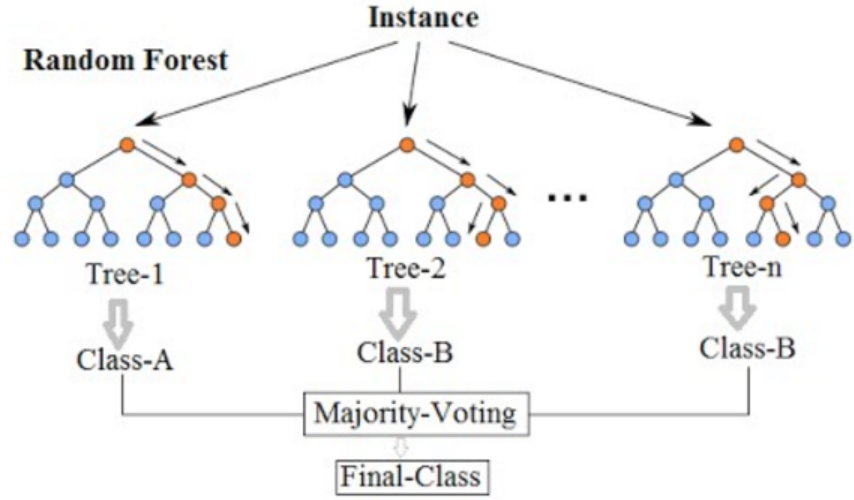

* Assume number of rows in the training set is N. Then, a sample of n < N rows is taken at random but with replacement. This sample will be the training set for growing the tree.
* If there are M input variables, a number m < M is specified such that at each node, m variables are selected at random out of the M. The best split on these m is used to split the node. The value of m is held constant while we grow the forest.
* Each tree is grown to the largest extent possible and there is no pruning.
* Predict new data by aggregating the predictions of the n tree trees (i.e., majority votes for classification, average for regression).

###**Boosting**

Boosting fit a sequence of weak learners − models that are only slightly better than random guessing, such as small decision trees − to weighted versions of the data. More weight is given to examples that were misclassified by earlier rounds.

**GradientBoosting**

Gradient Boosting Machine (GBM) builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

* It fits a naive model on the dataset($(x_1,y_1),(x_2,y_2),...$), a simple tree(call this model $F_o(x)$) by taking a loss function(ex. MSE).
* **On first iteration:** Get residuals of all predictions i.e. $r_{i1}(x) = y_i - F_o(x)$.
* Fit a model on these residuals i.e ($(x_1,r_{11}),(x_2,r_{21}),...$) and call this model $h_1(x)$.
* New predictor is $F_1(x) = F_o(x) + λh_1(x).$ Find λ which minimizes MSE and so on.
* * **On final iteration:** Get residuals of all predictions i.e. $r_{im}(x) = y_i - F_{m-1}(x)$.
* Fit a model on these residuals i.e ($(x_1,r_{1m}),(x_2,r_{2m}),...$) and call this model $h_m(x)$.
* New predictor is $F_m(x) = F_{m-1}(x) + λ_mh_{m-1}(x).$ Find λ_m which minimizes MSE.


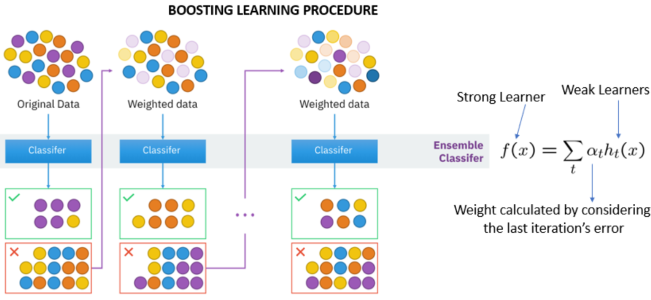


## Bagging v/s Boosting:

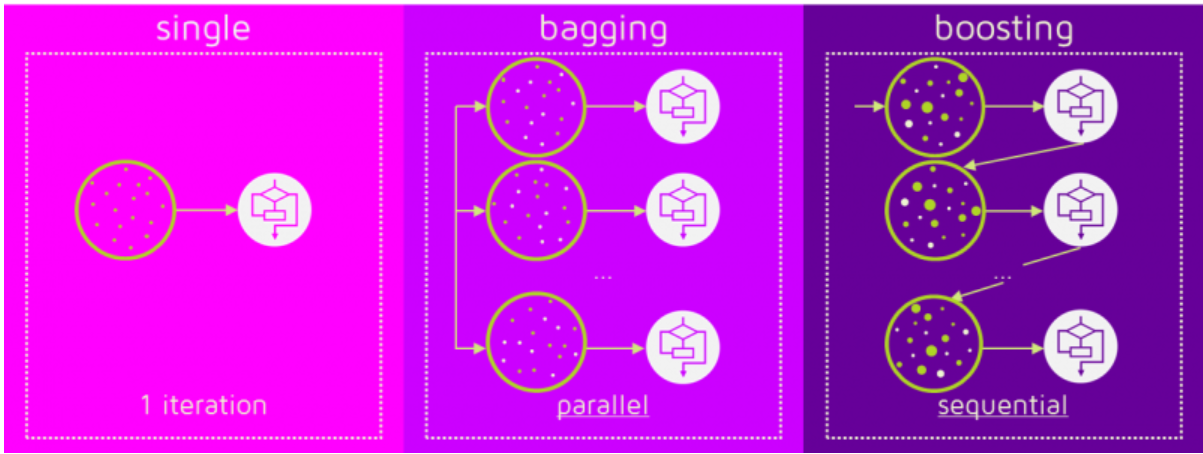

In [ ]:
#other models to fit on

# Ensemble models
for model in [RandomForestRegressor(),GradientBoostingRegressor()]:
  model_implement(model=model,x_train=X_train,y_train=y_train,x_test=X_test,y_test=y_test)

model:  RandomForestRegressor()
model:  GradientBoostingRegressor()


In [ ]:
Display_report = pd.DataFrame(report.values(),index=report.keys())
Display_report

mse         mae        rmse  r2_score  \
LinearRegression()           163826.885464  308.659562  404.755340  0.582698   
Lasso()                      164345.538702  308.337331  405.395534  0.581377   
Ridge()                      163709.706647  308.637576  404.610562  0.582997   
Lasso(alpha=0.01)            163813.931917  308.636740  404.739338  0.582731   
Ridge(alpha=1)               163709.706647  308.637576  404.610562  0.582997   
RandomForestRegressor()       41570.545395  112.525346  203.888561  0.894111   
GradientBoostingRegressor()   61508.823332  159.213604  248.009724  0.843324   
DecisionTreeRegressor()       78516.131128  150.691081  280.207300  0.800003   

                             adjusted_r2_score  
LinearRegression()                    0.577707  
Lasso()                               0.576370  
Ridge()                               0.578009  
Lasso(alpha=0.01)                     0.577740  
Ridge(alpha=1)                        0.578009  
RandomForestRegressor()               0.892844  
GradientBoostingRegressor()           0.841450  
DecisionTreeRegressor()               0.797611

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#tuning hyperparameter for decisointree regressor
#setting parameters for grid search cv
param_dt={'max_depth': [15,20,25],
          'min_samples_leaf':[1,2,5,7,10],
          'max_leaf_nodes':[None,10,40,70,100]
        }

grid_dt=GridSearchCV(estimator=DecisionTreeRegressor(),
                     param_grid=param_dt,
                     scoring='r2',
                     cv=3,verbose=2)
#fitting the models with parameters
grid_dt.fit(X_train,y_train)

#best model after gridsearchcv
best_dt=grid_dt.best_estimator_

Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV] END max_depth=15, max_leaf_nodes=None, min_samples_leaf=1; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=None, min_samples_leaf=1; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=None, min_samples_leaf=1; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=None, min_samples_leaf=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=None, min_samples_leaf=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=None, min_samples_leaf=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=None, min_samples_leaf=5; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=None, min_samples_leaf=5; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=None, min_samples_leaf=5; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=None, min_samples_leaf=7; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=None, min_samples_leaf=7; total time=   0.0s
[CV] END max_depth=15, ma

In [ ]:
print('\033[1mBest DecisionTreeRegressor model\033[0m')
best_dt

Best DecisionTreeRegressor model


DecisionTreeRegressor(max_depth=15, min_samples_leaf=10)

In [ ]:
#tuning hyperparameters for random forest regressor
param_rf={'max_depth': [15,20,25],
        'n_estimators':[100,200,400],
        'max_samples':[0.5,0.6,0.8,],
        'max_features':[10,15,20,25]
        }
grid_rf=GridSearchCV(estimator=RandomForestRegressor(),
                     param_grid=param_rf,
                     scoring='r2',
                     cv=3,verbose=2)
grid_rf.fit(X_train,y_train)
best_rf=grid_rf.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=15, max_features=10, max_samples=0.5, n_estimators=100; total time=   0.6s
[CV] END max_depth=15, max_features=10, max_samples=0.5, n_estimators=100; total time=   0.6s
[CV] END max_depth=15, max_features=10, max_samples=0.5, n_estimators=100; total time=   0.6s
[CV] END max_depth=15, max_features=10, max_samples=0.5, n_estimators=200; total time=   1.1s
[CV] END max_depth=15, max_features=10, max_samples=0.5, n_estimators=200; total time=   1.1s
[CV] END max_depth=15, max_features=10, max_samples=0.5, n_estimators=200; total time=   1.1s
[CV] END max_depth=15, max_features=10, max_samples=0.5, n_estimators=400; total time=   2.3s
[CV] END max_depth=15, max_features=10, max_samples=0.5, n_estimators=400; total time=   2.3s
[CV] END max_depth=15, max_features=10, max_samples=0.5, n_estimators=400; total time=   2.7s
[CV] END max_depth=15, max_features=10, max_samples=0.6, n_estimators=100; total time=   0.

In [ ]:
best_rf

RandomForestRegressor(max_depth=20, max_features=15, max_samples=0.8,
                      n_estimators=200)

In [ ]:
#tuning hyperparameter for gradient boosting regressor
param_gbr={'max_depth': [15,20,25],
           'n_estimators':[100,200,400],
          'max_features':[10,15,20,25]
        }
grid_gbr = GridSearchCV(estimator=GradientBoostingRegressor(),
                                     param_grid=param_gbr,
                                     cv=3,verbose=2)
grid_gbr.fit(X_train,y_train)
best_gbr=grid_gbr.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END ....max_depth=15, max_features=10, n_estimators=100; total time=   1.3s
[CV] END ....max_depth=15, max_features=10, n_estimators=100; total time=   1.3s
[CV] END ....max_depth=15, max_features=10, n_estimators=100; total time=   1.3s
[CV] END ....max_depth=15, max_features=10, n_estimators=200; total time=   2.6s
[CV] END ....max_depth=15, max_features=10, n_estimators=200; total time=   3.0s
[CV] END ....max_depth=15, max_features=10, n_estimators=200; total time=   2.5s
[CV] END ....max_depth=15, max_features=10, n_estimators=400; total time=   5.1s
[CV] END ....max_depth=15, max_features=10, n_estimators=400; total time=   5.5s
[CV] END ....max_depth=15, max_features=10, n_estimators=400; total time=   5.4s
[CV] END ....max_depth=15, max_features=15, n_estimators=100; total time=   1.7s
[CV] END ....max_depth=15, max_features=15, n_estimators=100; total time=   1.8s
[CV] END ....max_depth=15, max_features=15, n_e

In [ ]:
best_gbr

GradientBoostingRegressor(max_depth=15, max_features=10, n_estimators=400)

In [ ]:
#other models to fit on
for model in [best_dt,best_gbr,best_rf]:
  model_implement(model=model,x_train=X_train,y_train=y_train,x_test=X_test,y_test=y_test)

model:  DecisionTreeRegressor(max_depth=15, min_samples_leaf=10)
model:  GradientBoostingRegressor(max_depth=15, max_features=10, n_estimators=400)
model:  RandomForestRegressor(max_depth=20, max_features=15, max_samples=0.8,
                      n_estimators=200)


In [ ]:
Display_report = pd.DataFrame(report.values(),index=report.keys())
Display_report

mse         mae  \
LinearRegression()                                  163826.885464  308.659562   
Lasso()                                             164345.538702  308.337331   
Ridge()                                             163709.706647  308.637576   
Lasso(alpha=0.01)                                   163813.931917  308.636740   
Ridge(alpha=1)                                      163709.706647  308.637576   
RandomForestRegressor()                              41570.545395  112.525346   
GradientBoostingRegressor()                          61508.823332  159.213604   
DecisionTreeRegressor()                              78516.131128  150.691081   
DecisionTreeRegressor(max_depth=15, min_samples...   68250.329663  148.546966   
GradientBoostingRegressor(max_depth=15, max_fea...   41324.733644  111.825450   
RandomForestRegressor(max_depth=20, max_feature...   40633.547351  112.172793   

                                                          rmse  r2_score  \
LinearRegression()                                  404.755340  0.582698   
Lasso()                                             405.395534  0.581377   
Ridge()                                             404.610562  0.582997   
Lasso(alpha=0.01)                                   404.739338  0.582731   
Ridge(alpha=1)                                      404.610562  0.582997   
RandomForestRegressor()                             203.888561  0.894111   
GradientBoostingRegressor()                         248.009724  0.843324   
DecisionTreeRegressor()                             280.207300  0.800003   
DecisionTreeRegressor(max_depth=15, min_samples...  261.247640  0.826152   
GradientBoostingRegressor(max_depth=15, max_fea...  203.284858  0.894737   
RandomForestRegressor(max_depth=20, max_feature...  201.577646  0.896498   

                                                    adjusted_r2_score  
LinearRegression()                                           0.577707  
Lasso()                                                      0.576370  
Ridge()                                                      0.578009  
Lasso(alpha=0.01)                                            0.577740  
Ridge(alpha=1)                                               0.578009  
RandomForestRegressor()                                      0.892844  
GradientBoostingRegressor()                                  0.841450  
DecisionTreeRegressor()                                      0.797611  
DecisionTreeRegressor(max_depth=15, min_samples...           0.824073  
GradientBoostingRegressor(max_depth=15, max_fea...           0.893478  
RandomForestRegressor(max_depth=20, max_feature...           0.895260

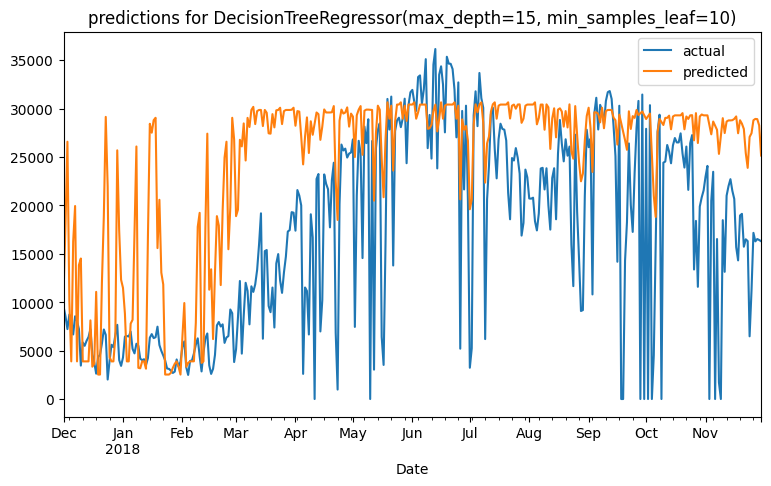

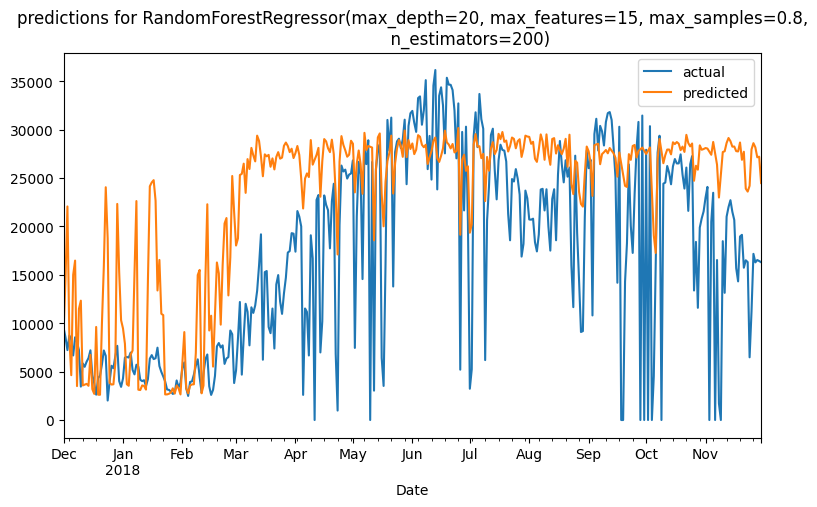

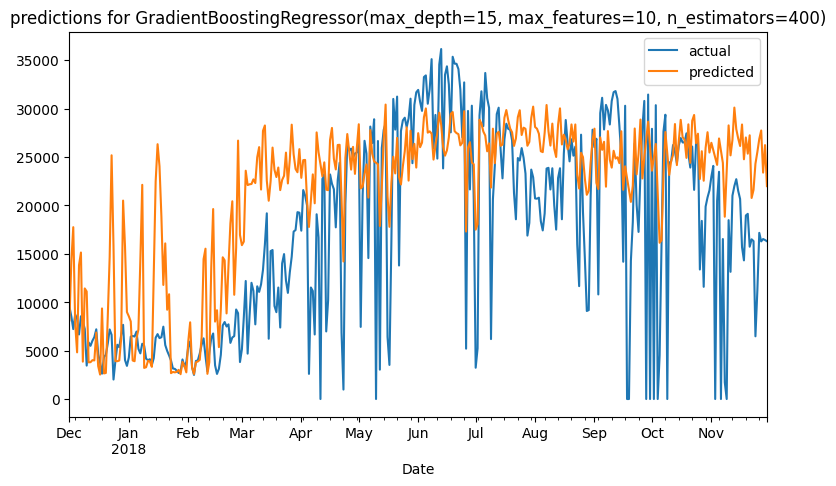

In [ ]:
for model in [best_dt,best_rf,best_gbr]:
    visualize_data(model,X,X_train,y_train)

##### Which hyperparameter optimization technique have you used and why?

**GridSearchCV** is the process of performing **hyperparameter tuning** in order to determine the **optimal** values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

As we can see from the report that before and after hyperparameter tuning r2_score for
*  DecisionTreeRegressor changes .80 to .84
*  RandomForestRegressor roughly remains same at.89
*  GradientBoostingRegressor changes from .84 to .89

and adjusted_r2_score
*  DecisionTreeRegressor .84 to .89
*  RandomForestRegressor roughly remained same at .89
*  GradientBoostingRegressor changes from .84 to .89

While linear models have not performed well with r2_score less than .5 for all three Linaer, Lasso and Ridge Regresson.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

**R-squared**

Evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression. For the same data set, higher R-squared values represent smaller differences between the observed data and the fitted values.

R-squared is the percentage of the dependent variable variation that a linear model explains.

**For Adjusted R-squared**

While R-squared tends to increase as more variables are added to the model (even if they don't improve the model significantly), Adjusted R-squared penalizes the addition of unnecessary variables.

It considers the number of predictors in the model and adjusts R-squared accordingly. This adjustment helps to avoid overfitting, providing a more accurate measure of the model's goodness of fit.

**For MAE/MSE/RMSE**

These are mean absolute error/ mean squared error/ root mean squared error and are better they are closer to zero.


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

R-squared and Adjusted R-squared are good indication together of how the model is. Values of both close to 1 are considered goog as it shows the how much dependent variable can be described by independent variables.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Both RandomForestRegressor and GradientBoostingRegressor give us results for both the above metrics makeing them good models for the dataset. But Gradient Boosting Regressor gives slightly better results as compared to

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

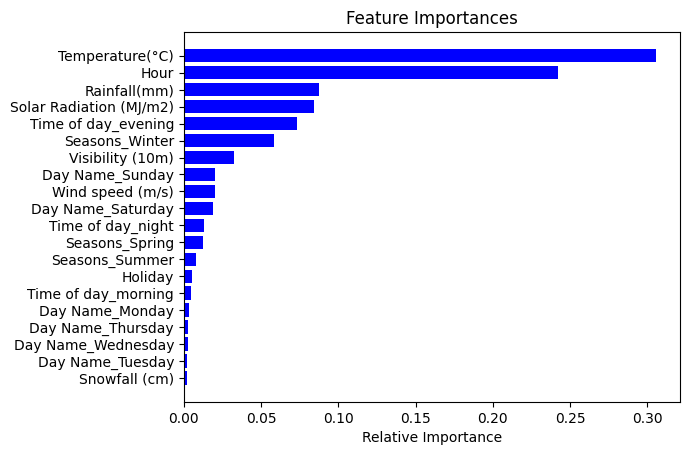

In [ ]:
features=X.columns
importances = best_gbr.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show;

In [ ]:
# installing shap for feature importances
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.5 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(best_rf)
shap_values=explainer.shap_values(X_test)

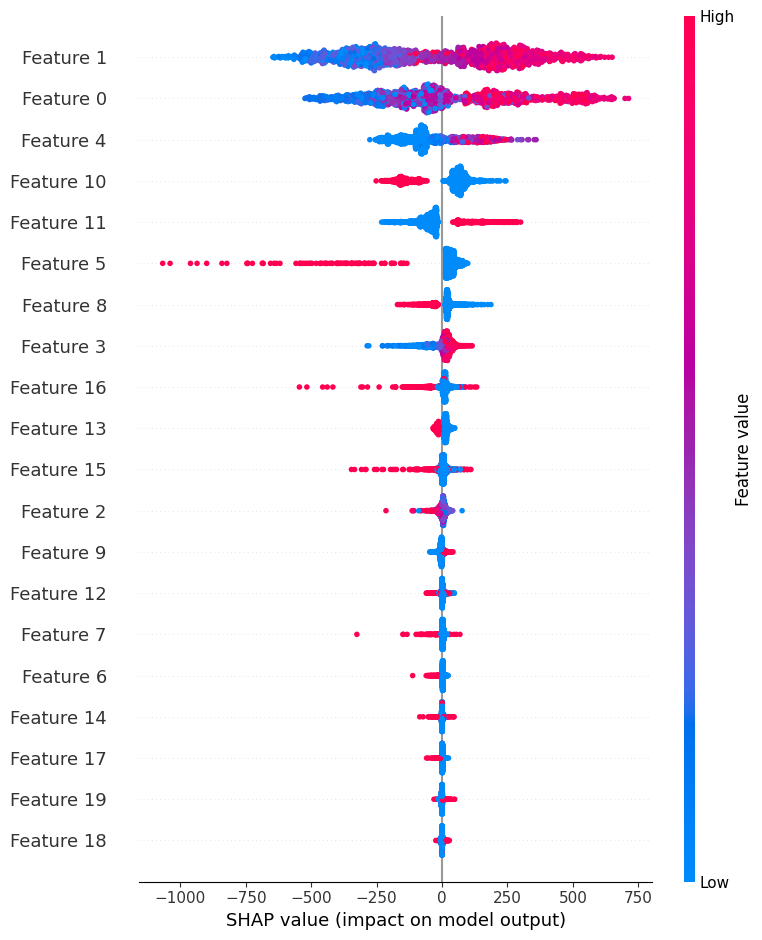

In [ ]:
shap.summary_plot(shap_values,X_test)

In [ ]:
X.columns[1],X.columns[0],X.columns[4],X.columns[10],X.columns[11],

('Temperature(°C)',
 'Hour',
 'Solar Radiation (MJ/m2)',
 'Seasons_Winter',
 'Time of day_evening')

The most important features are  **Temperature**, **Hour**, **Rainfall(mm)**, **Solar Radiation (Mj/m2)**, **winter season**, **Time of day_evening** respectivley.

we have used **RandomForestRegressor** which has in built feature importance attributes.

## **Future Work**

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
import pickle

In [ ]:
# Save the File
pickle.dump(best_rf,open('best_rf_model_regressor.pkl','wb'))

!cp best_rf_model_regressor.pkl /content/drive/MyDrive/saved

pickle.dump(best_cat,open('best_cat_model_regressor.pkl','wb'))
!cp best_cat_model_regressor.pkl /content/drive/MyDrive/saved

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
best_rf =pickle.load(open('/content/drive/MyDrive/saved/best_rf_model_regressor.pkl','rb'))
best_cat=pickle.load(open('/content/drive/MyDrive/saved/best_cat_model_regressor.pkl','rb'))

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


*  The Models used for this Classsification problem are:

  *   Linear Regression Model
  *   Lasso regression Model
  *   Ridge Model
  *   Decision Tree Regressor Model
  *   Random Forest Regressor Model
  *   Gradient Boosting Regressor

*  We performed Hyperparameter tuning using Gridsearch CV method the models. To increase accuracy and avoid Overfitting Criteria, this is done. After that, we finalized the Gradient Boosting model by fine-tuning the hyperparameters.

*  Based on the knowledge of the business and the problem usecase. The metrics used were r-squared and adjusted r-squared

*  The Linear Models did poorly with relatively low scores while ensemble methods all did considerably good shows the complex relationship between the dependent and independent variables.

*  The best model was Random Forest Regressor with r-squared score and adjusted s-aquared score of .89

*  The most important feature are  **Temperature**, **Hour**, **Rainfall(mm)**, **Solar Radiation (Mj/m2)**, **winter season**, **Time of day_evening** respectivley that contribute to a model's prediction whether a passenger will recommened a particular airline to his/her friends.

*  The regressor models developed can be used to predict bike demands as it will give companies ability to identify areas to improve upon and impactful passengers who can help in bringing more revenues.